In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
def outliers(base_dir, ratio, threshold):
    """
    base_dir: the base directory of the simulation output data file
    ratio: the input C/O ratio
    threshold: the threshold of CH4 conversion
    """
    benergy_c = np.arange(-7.5, -5.25, 0.25)
    benergy_o = np.arange(-3.25, -5.5, -0.25)
    outliers = []
    total = 81
    i = -1
    paths = []
    for c_binding_energy in benergy_c:
        i += 1
        j = -1
        index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
        for o_binding_energy in benergy_o:
            j += 1
            index += 1

            try:
                f_path = '{}/{}_c{:.2f}o{:.2f}/sim_data/rtol_1e-10_atol_1e-20_data.csv'.format(base_dir, index, c_binding_energy, o_binding_energy)
                df = pd.read_csv(f_path)
                ch4_conv = df.loc[df['C/O ratio'].round(2) == ratio].loc[:,'Max CH4 Conv'].to_list()[0]
                if abs(ch4_conv) < threshold:
                    outliers.append(index)
            except Exception as e:
                print(e, f"check log files {index}")
    return outliers

In [9]:
def heat_map_gen(sp, property_, exclusion_original, exclusion_bm, ratio):
    """
    sp: index of species
    property_: index of the property to plot
    exclusion_original: a list of original model ids to be excluded from sensitivity data frame
    exclusion_bm: a list of bm model ids to be excluded from senstivity data frame
    ratio: the C/O input ratio
    """
    benergy_c = np.arange(-7.5, -5.25, 0.25)
    benergy_o = np.arange(-3.25, -5.5, -0.25)
    data_original = np.zeros((len(benergy_c), len(benergy_o)))
    data_bm = np.zeros((len(benergy_c), len(benergy_o)))
    parent_dir = os.path.dirname(os.getcwd())
    # read the first file to extract the species and properties list
    f = f'{parent_dir}/base_original/binding_energies/1.0_c-5.50o-3.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv'
    df = pd.read_csv(f)
    species = df.loc[:, 'Species'].to_list()
    properties = df.columns.to_list()
    
    total = 81
    i = -1
    paths = []
    for c_binding_energy in benergy_c:
        i += 1
        j = -1
        index = total - ((7.5 - abs(c_binding_energy)) / 0.25 + 1) * 9
        for o_binding_energy in benergy_o:
            j += 1
            index += 1

            try:            
                # read the simulation files
                if index not in exclusion_original:
                    original_path_sens = '{}/base_original/binding_energies/{}_c{:.2f}o{:.2f}/sensitivities/{}/{}SpSensitivity_rtol1.00e-10_atol1.00e-20.csv'.format(parent_dir, index, c_binding_energy, o_binding_energy, ratio, ratio)
                    df_original = pd.read_csv(original_path_sens)
                    charac_sens_original = df_original.loc[df_original['Species'] == df_original['Species'][sp]].iloc[:,property_].to_list()[0]
                    data_original[j][i] = charac_sens_original
                                   
                if index not in exclusion_bm:
                    bm_path_sens = '{}/base_bm/binding_energies/{}_c{:.2f}o{:.2f}/sensitivities/{}/{}SpSensitivity_rtol1.00e-10_atol1.00e-20.csv'.format(parent_dir, index, c_binding_energy, o_binding_energy, ratio, ratio)
                    df_bm = pd.read_csv(bm_path_sens)
                    charac_sens_bm = df_bm.loc[df_bm['Species'] == df_bm['Species'][sp]].iloc[:,property_].to_list()[0]
                    data_bm[j][i] = charac_sens_bm
                    
            except Exception as e:
                print(e, f"check log files {index}")
    original_df = pd.DataFrame(data_original, columns=benergy_c, index=benergy_o)
    bm_df = pd.DataFrame(data_bm, columns=benergy_c, index=benergy_o)
    sns.set_style("darkgrid")
    fig = plt.figure(figsize=(16,9))
    ax1 = fig.add_subplot(121, aspect='equal')
    ax2 = fig.add_subplot(122, aspect='equal')
    cmap = sns.color_palette("viridis", as_cmap=True)
    ax1 = sns.heatmap(original_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap, ax=ax1)
    ax1.set(title="original models {} sensitivity of {} at C/O=0.6".format(properties[property_], species[sp]),
          xlabel="$\\Delta E^C(ev)$",
          ylabel="$\\Delta E^O(ev)$",)
    ax2 = sns.heatmap(bm_df, xticklabels=benergy_c, yticklabels=benergy_o, annot=False, cmap=cmap, ax=ax2)
    ax2.set(title="bm models {} sensitivity of {} at C/O=0.6".format(properties[property_], species[sp]),
          xlabel="$\\Delta E^C(ev)$",
          ylabel="$\\Delta E^O(ev)$",)
    plt.plot()

[Errno 2] No such file or directory: '../base_original/binding_energies/81.0_c-7.50o-5.25/sim_data/rtol_1e-10_atol_1e-20_data.csv' check log files 81.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/77.0_c-7.50o-4.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 77.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/81.0_c-7.50o-5.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 81.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/34.0_c-6.25o-4.75/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 34.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_bm/binding_energies/19.0_c-6.00o-3.25/sensitivities/0.6/0.6SpSe

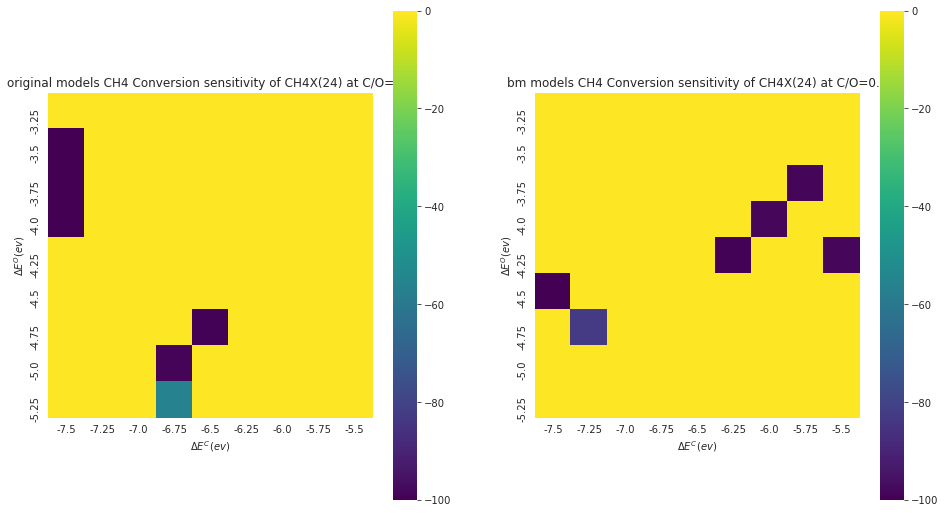

In [10]:
exceptions_original = outliers('../base_original/binding_energies', 0.6, 0.001)
exceptions_bm = outliers('../base_bm/binding_energies', 0.6, 0.001) 
# exceptions_original.append(26)
# exceptions_original.append(10)
# exceptions_bm.append(15)
heat_map_gen(4,8, exceptions_original, exceptions_bm, 0.6)

In [12]:
parent_dir = os.path.dirname(os.getcwd())
# read the first file to extract the species and properties list
f = f'{parent_dir}/base_original/binding_energies/1.0_c-5.50o-3.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv'
df = pd.read_csv(f)
species = df.loc[:, 'Species'].to_list()
properties = df.columns.to_list()

[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/77.0_c-7.50o-4.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 77.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/81.0_c-7.50o-5.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 81.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/34.0_c-6.25o-4.75/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 34.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_bm/binding_energies/19.0_c-6.00o-3.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 19.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_fin

[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/77.0_c-7.50o-4.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 77.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/81.0_c-7.50o-5.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 81.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/34.0_c-6.25o-4.75/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 34.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_bm/binding_energies/19.0_c-6.00o-3.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 19.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_fin

[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/77.0_c-7.50o-4.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 77.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/81.0_c-7.50o-5.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 81.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/34.0_c-6.25o-4.75/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 34.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_bm/binding_energies/19.0_c-6.00o-3.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 19.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_fin

[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/77.0_c-7.50o-4.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 77.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/81.0_c-7.50o-5.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 81.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/34.0_c-6.25o-4.75/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 34.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_bm/binding_energies/19.0_c-6.00o-3.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 19.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_fin

[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/77.0_c-7.50o-4.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 77.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/81.0_c-7.50o-5.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 81.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/34.0_c-6.25o-4.75/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 34.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_bm/binding_energies/19.0_c-6.00o-3.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 19.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_fin

[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/77.0_c-7.50o-4.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 77.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/81.0_c-7.50o-5.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 81.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/34.0_c-6.25o-4.75/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 34.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_bm/binding_energies/19.0_c-6.00o-3.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 19.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_fin

[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/77.0_c-7.50o-4.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 77.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/81.0_c-7.50o-5.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 81.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/34.0_c-6.25o-4.75/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 34.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_bm/binding_energies/19.0_c-6.00o-3.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 19.0
[Errno 2] No such file or directory: '/work/westgroup/chao/sketches/cpox_sim/bm_models_fin

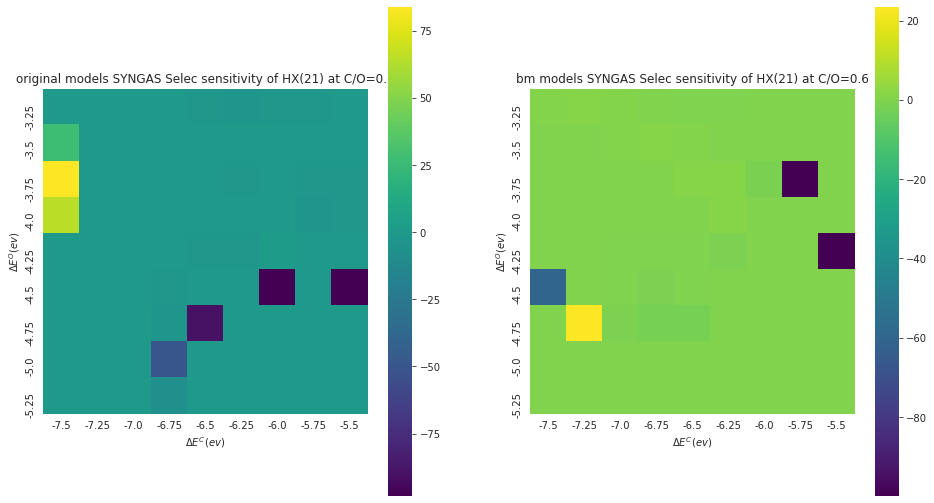

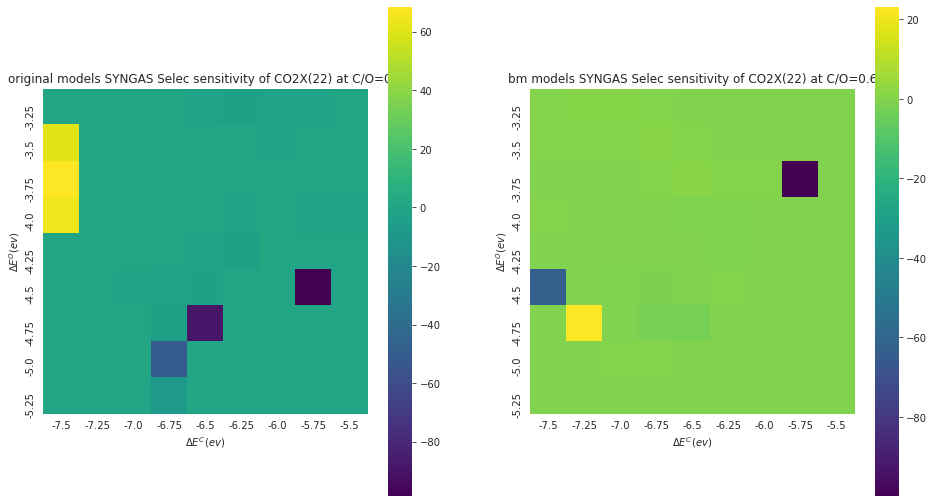

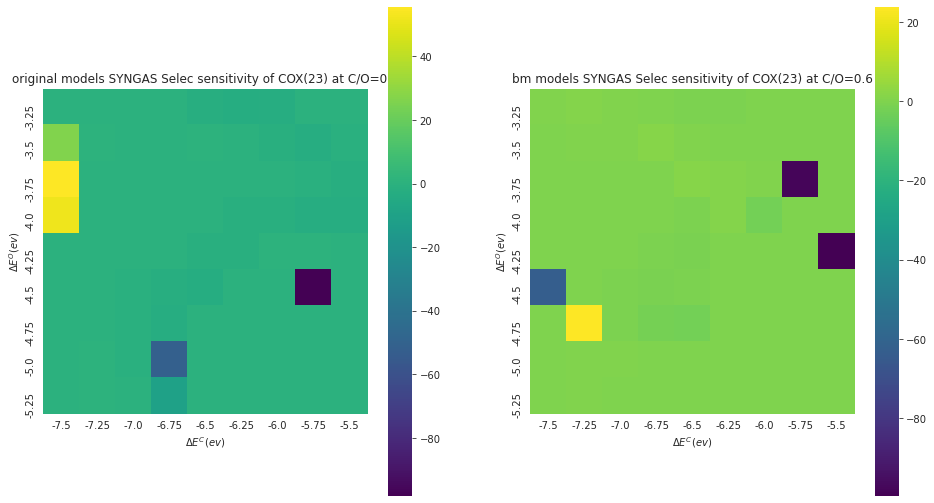

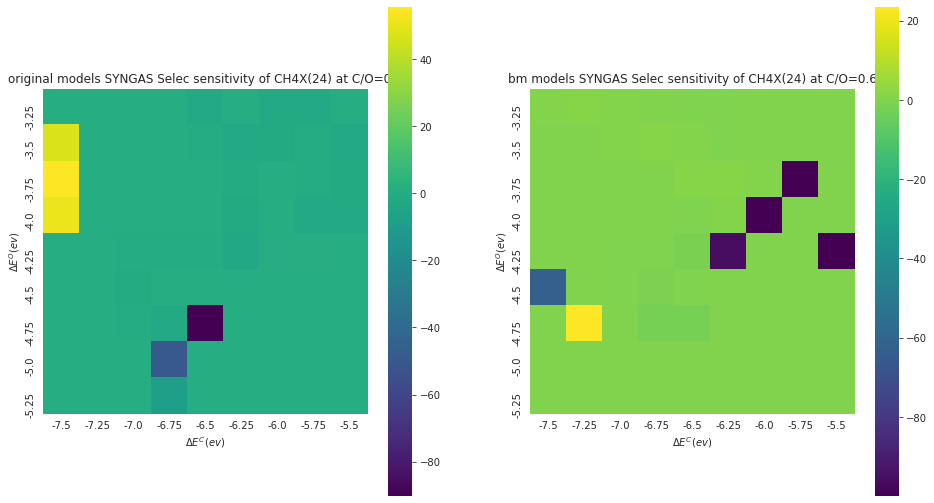

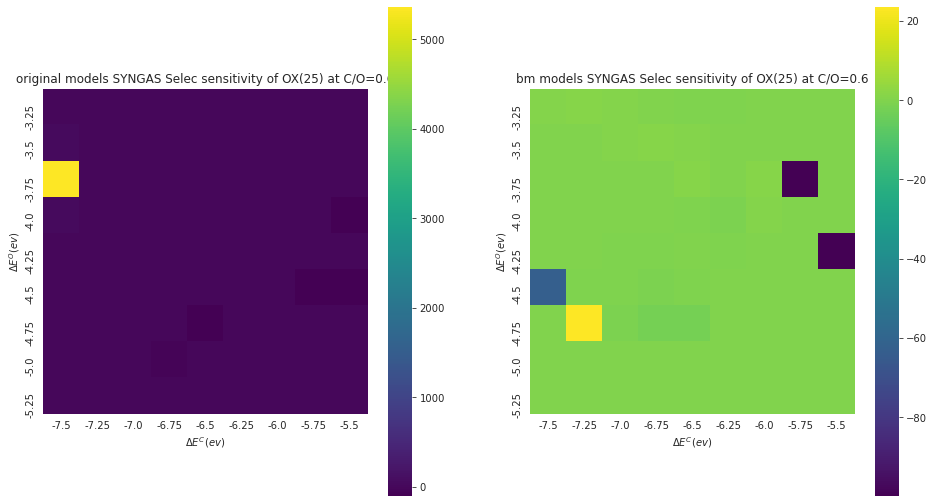

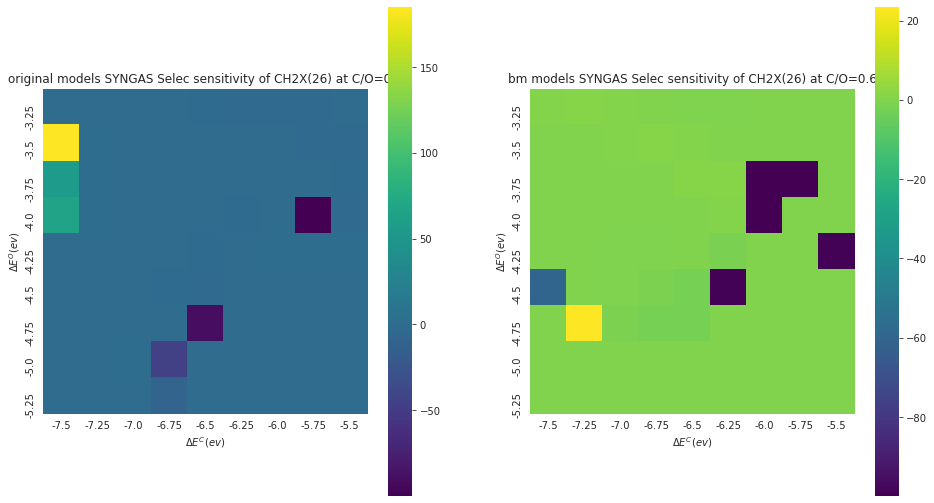

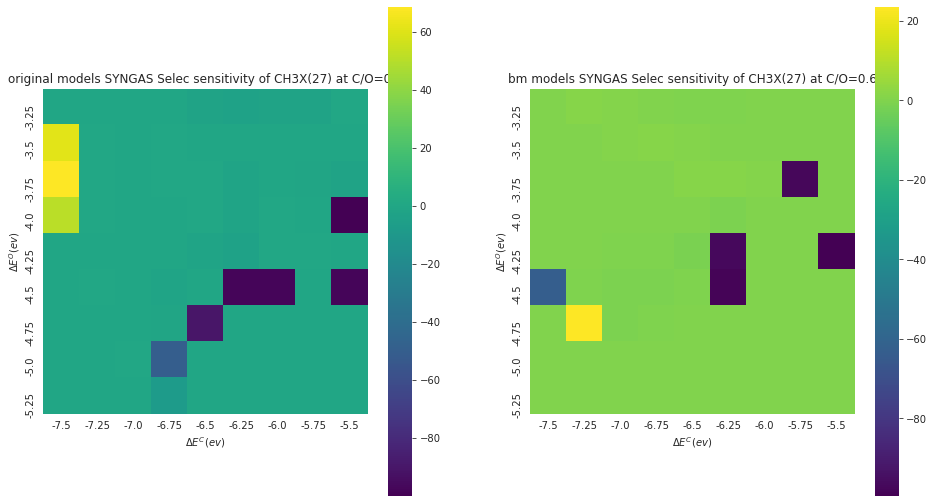

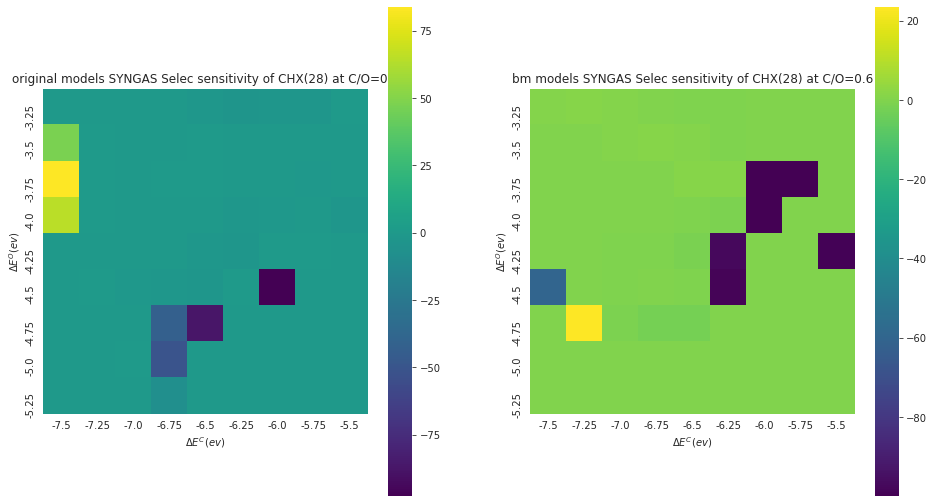

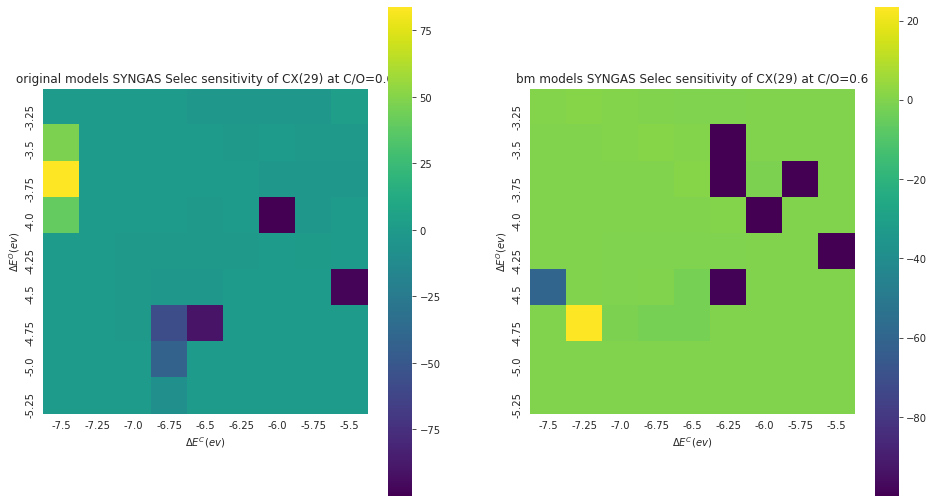

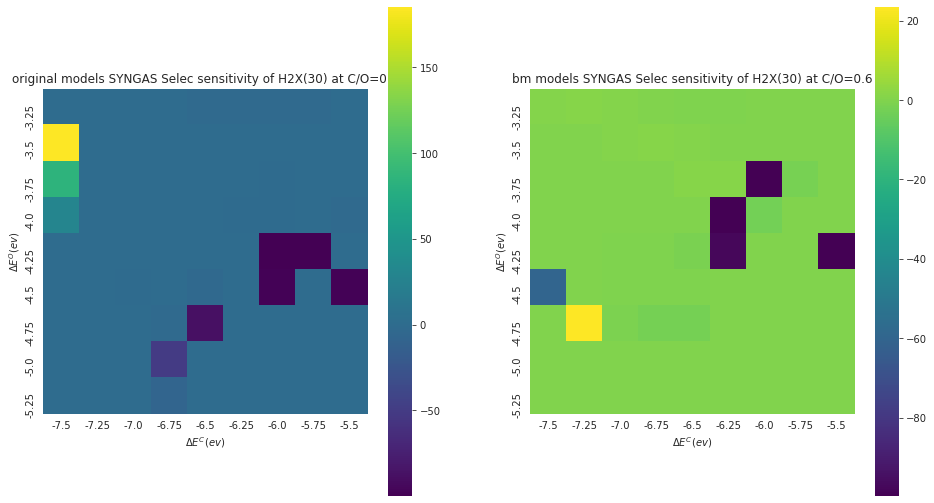

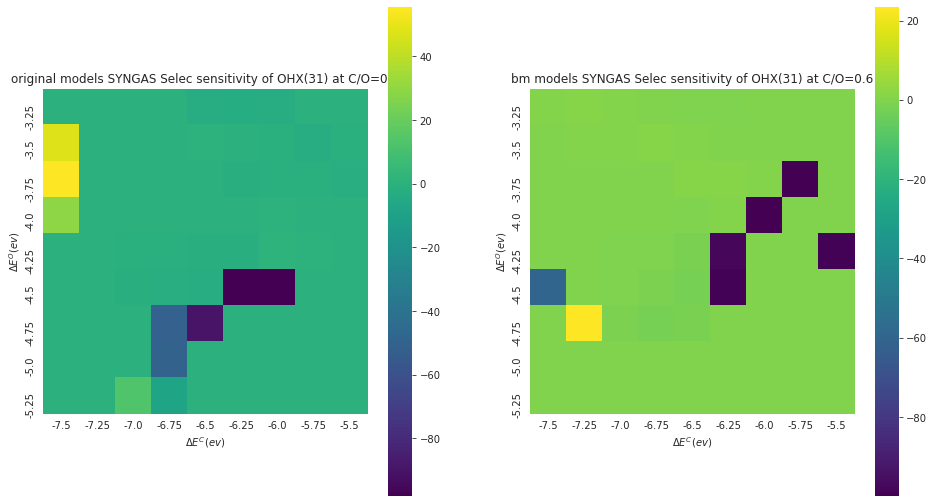

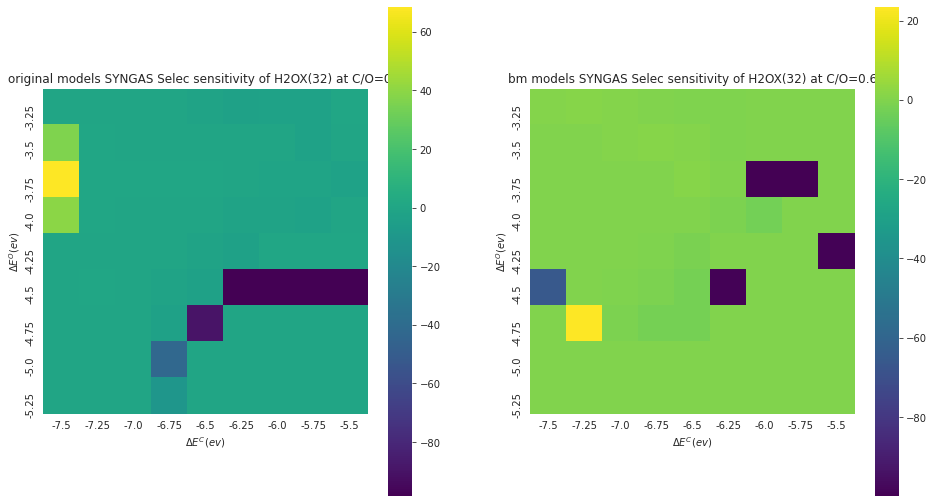

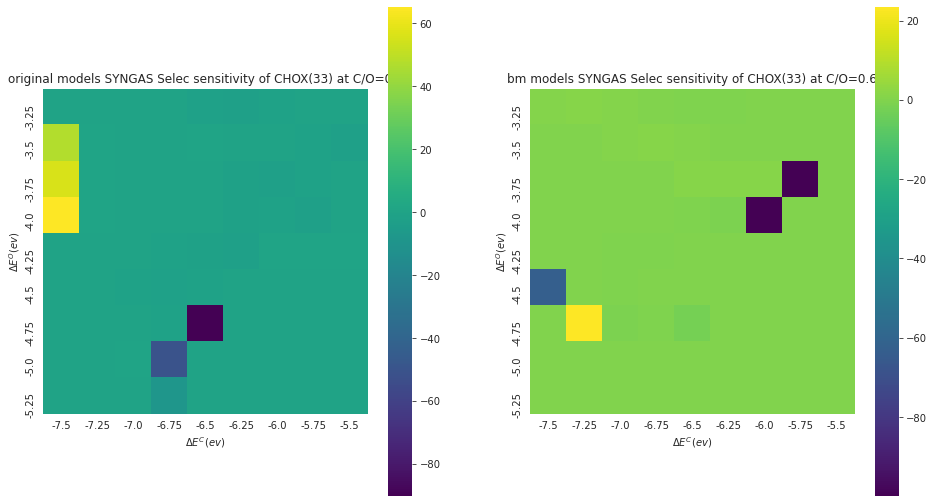

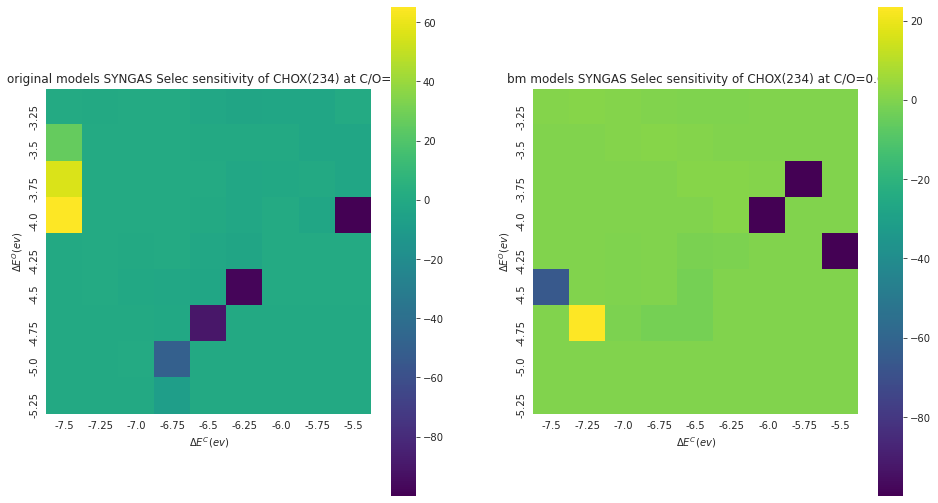

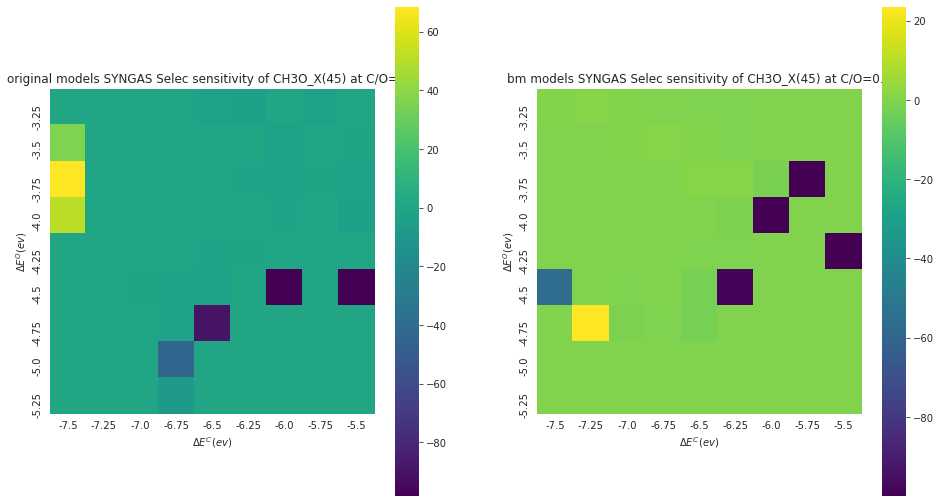

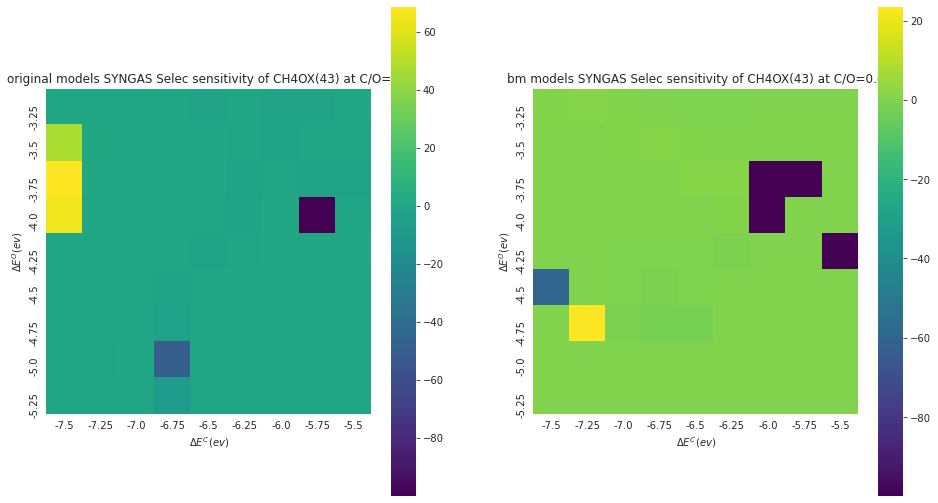

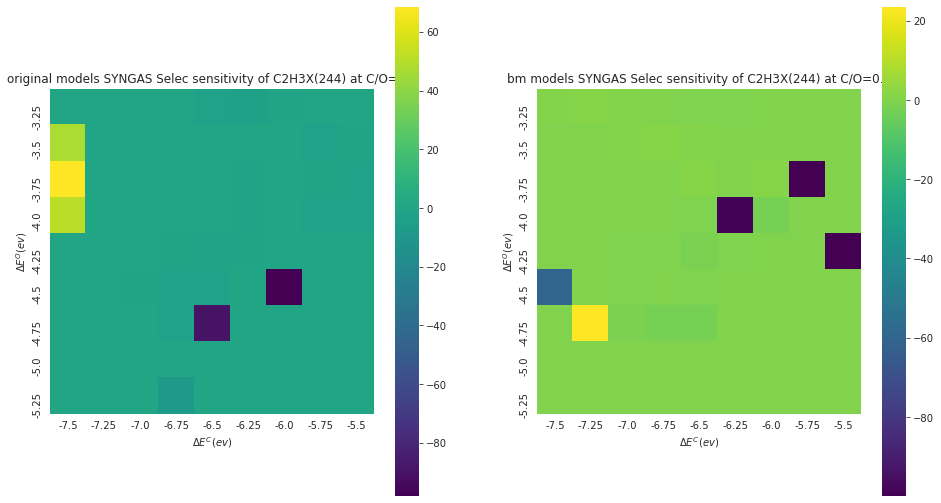

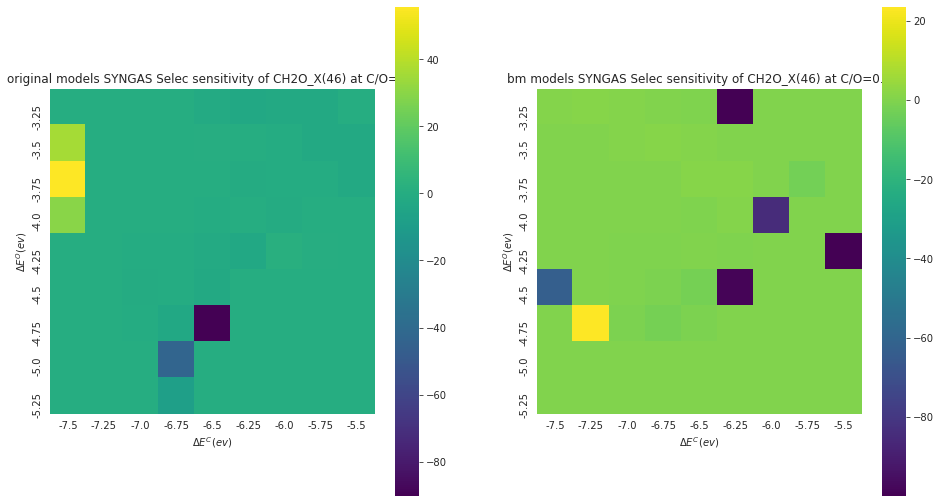

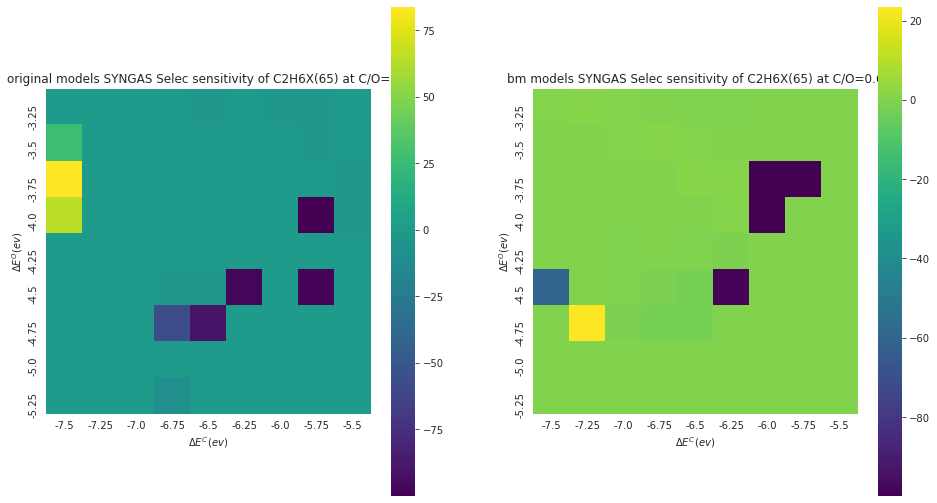

In [13]:
# SYNGAS Selec
for i in range(1, len(species)):
    heat_map_gen(i,2, exceptions_original, exceptions_bm, 0.6)

[Errno 2] No such file or directory: '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_original/binding_energies/81.0_c-7.50o-5.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 81.0
[Errno 2] No such file or directory: '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_original/binding_energies/81.0_c-7.50o-5.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 81.0
[Errno 2] No such file or directory: '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_original/binding_energies/81.0_c-7.50o-5.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 81.0
[Errno 2] No such file or directory: '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_original/binding_energies/81.0_c-7.50o-5.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 81.0
[Errno 2] No such file or directory: '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_original/binding_energies/81.0_

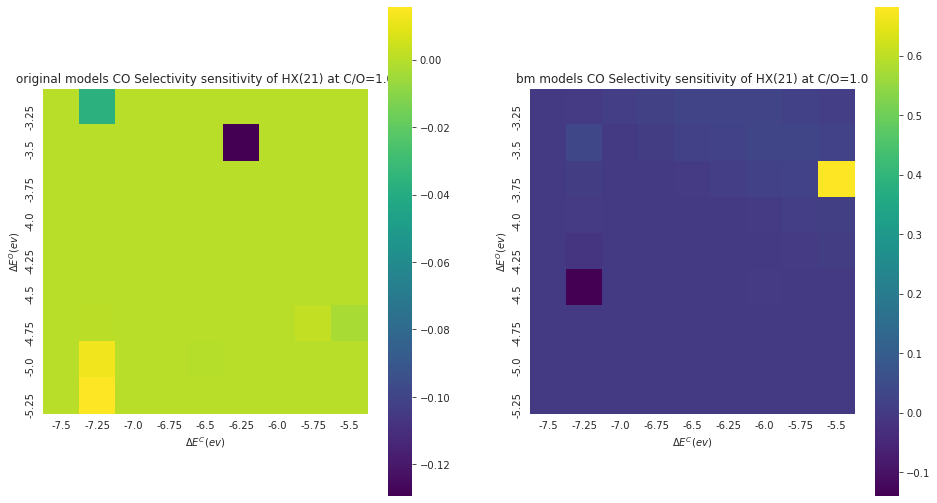

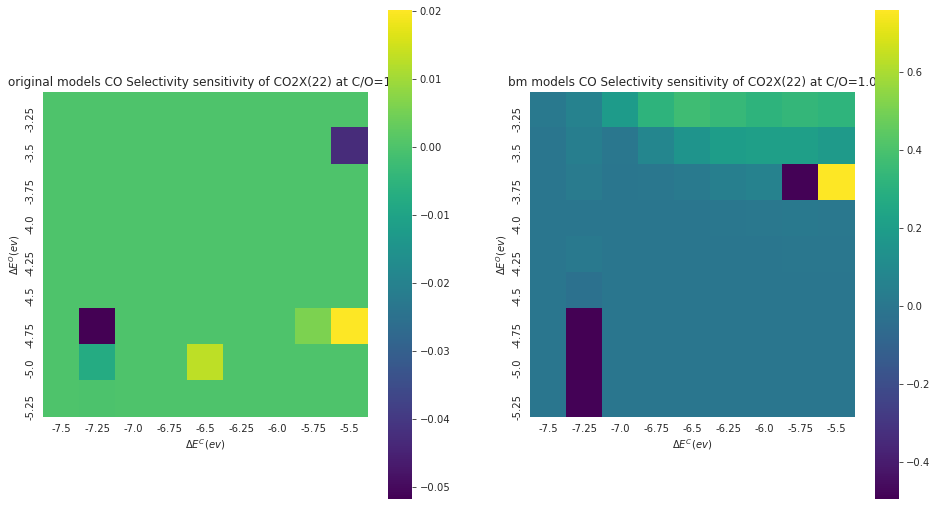

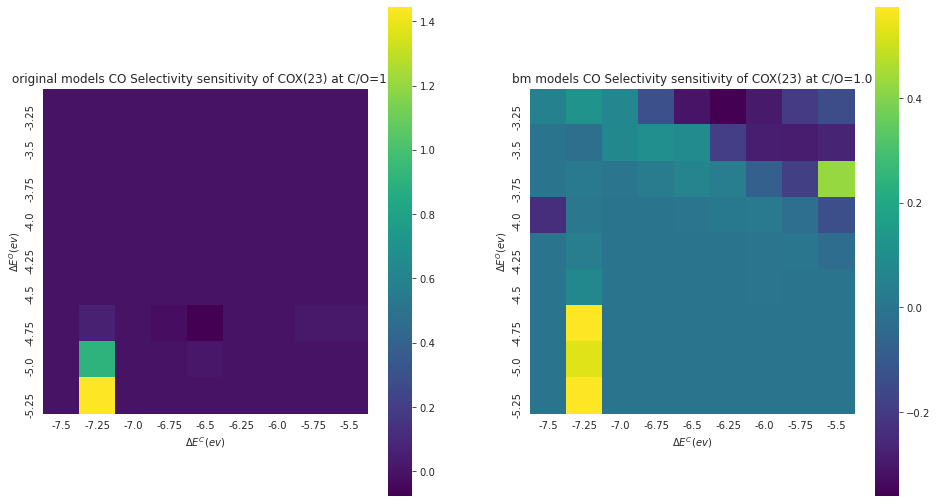

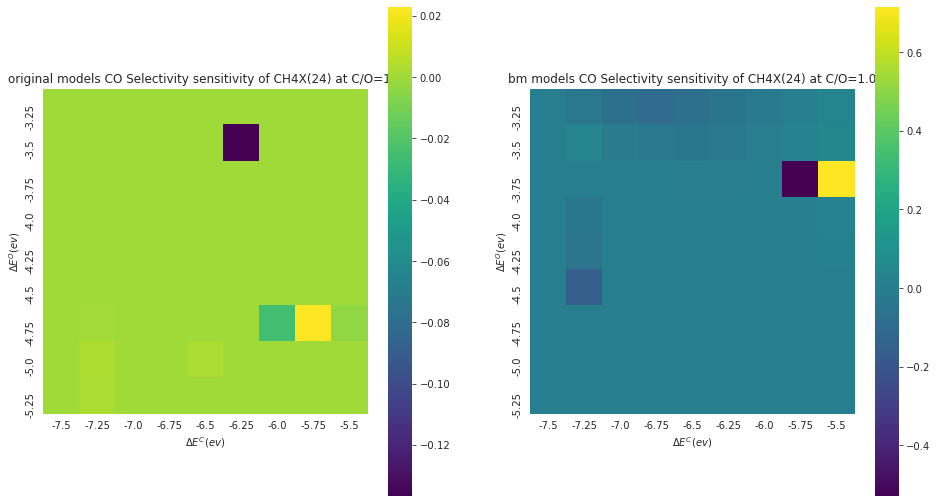

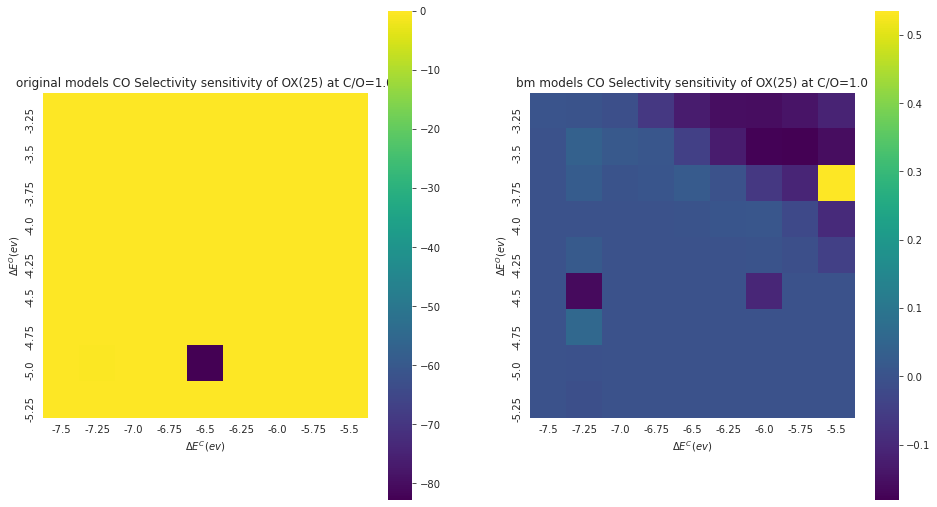

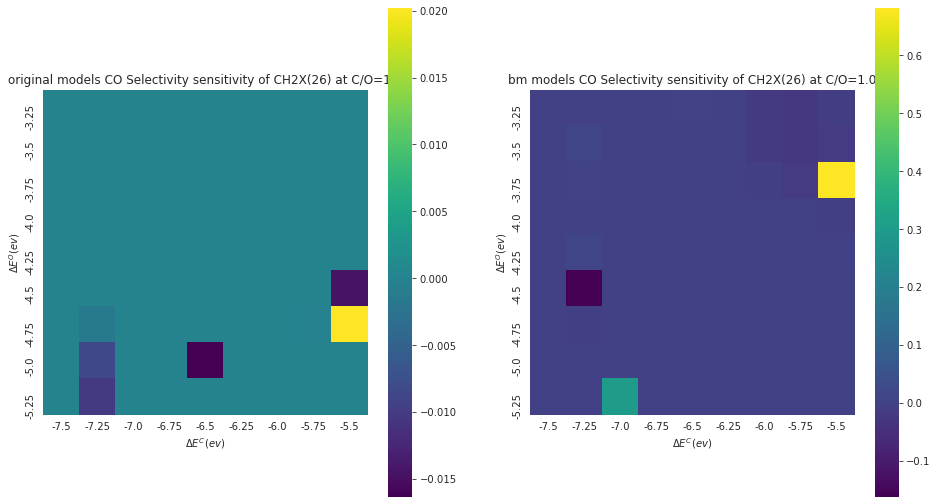

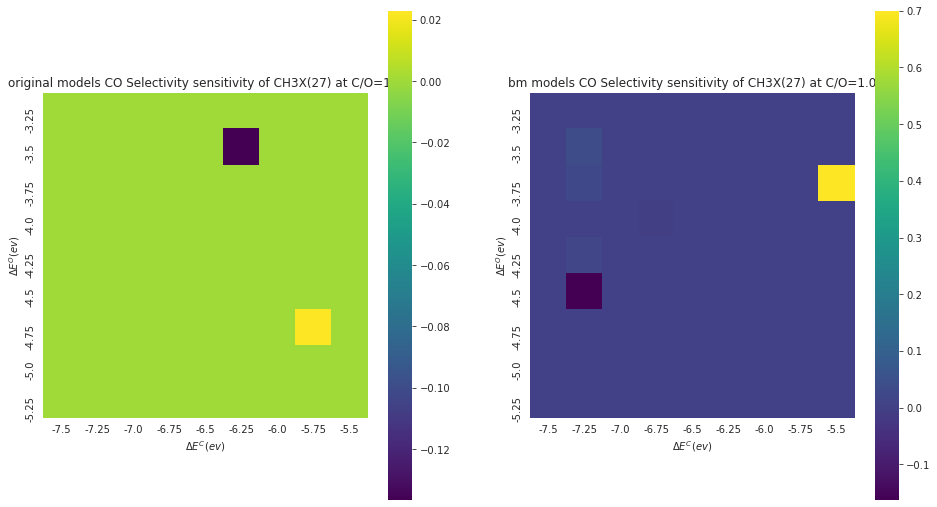

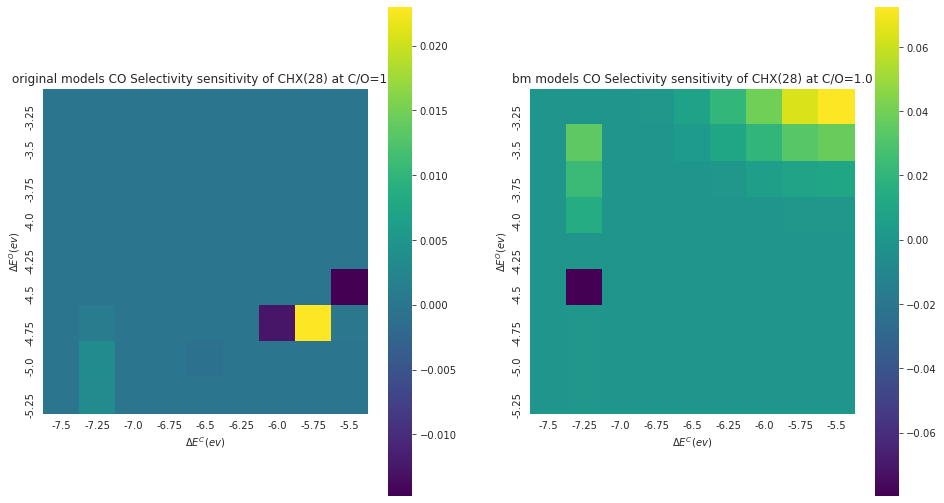

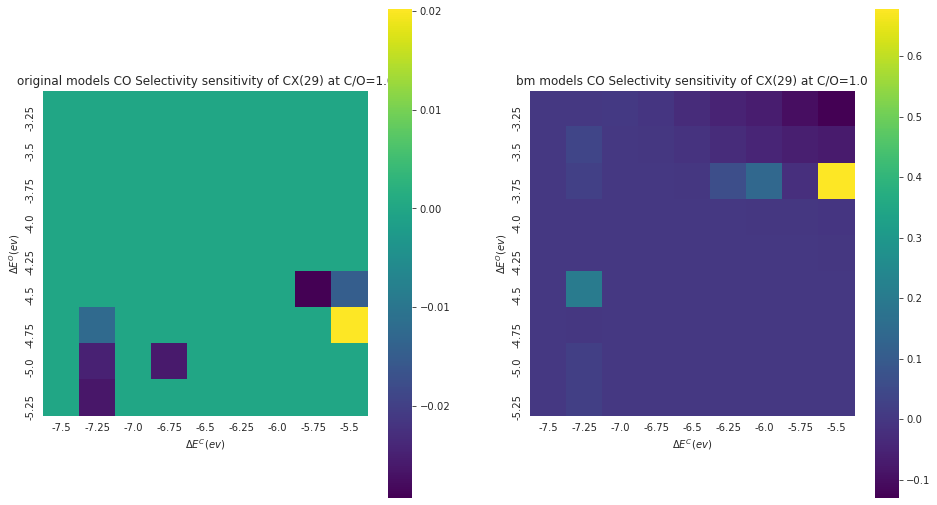

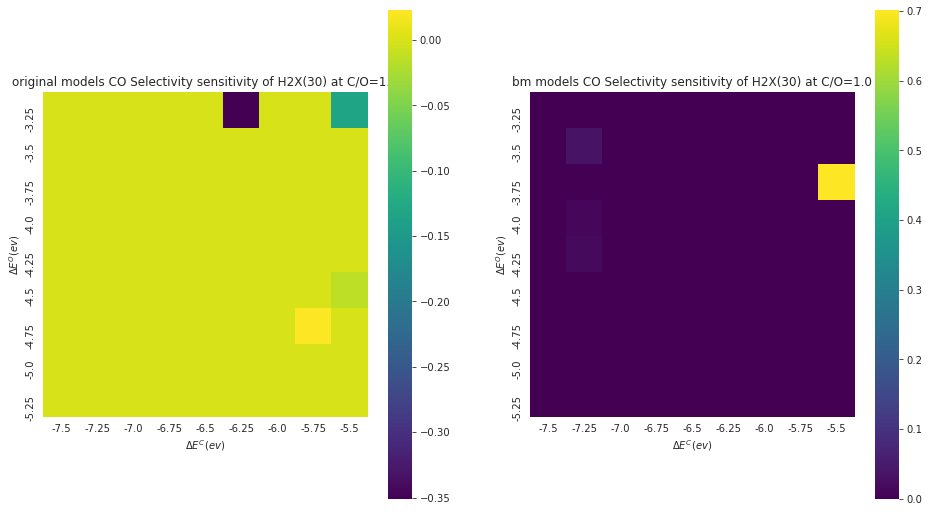

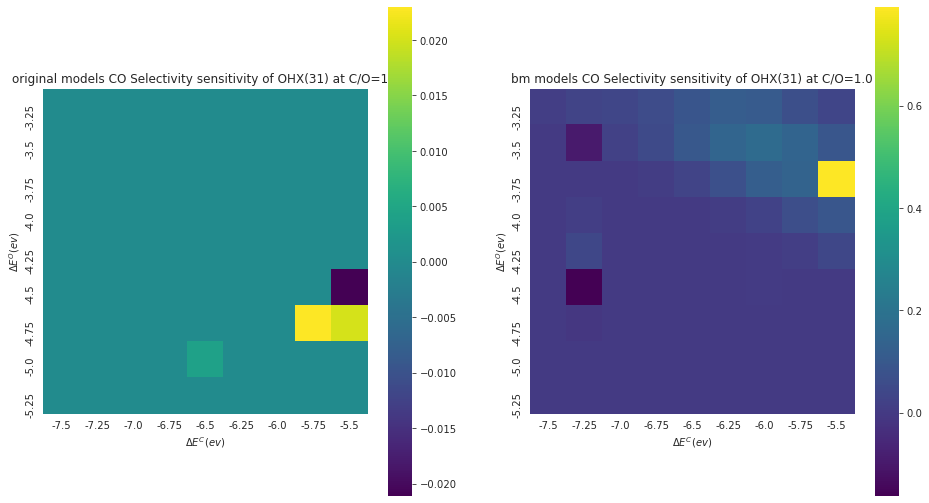

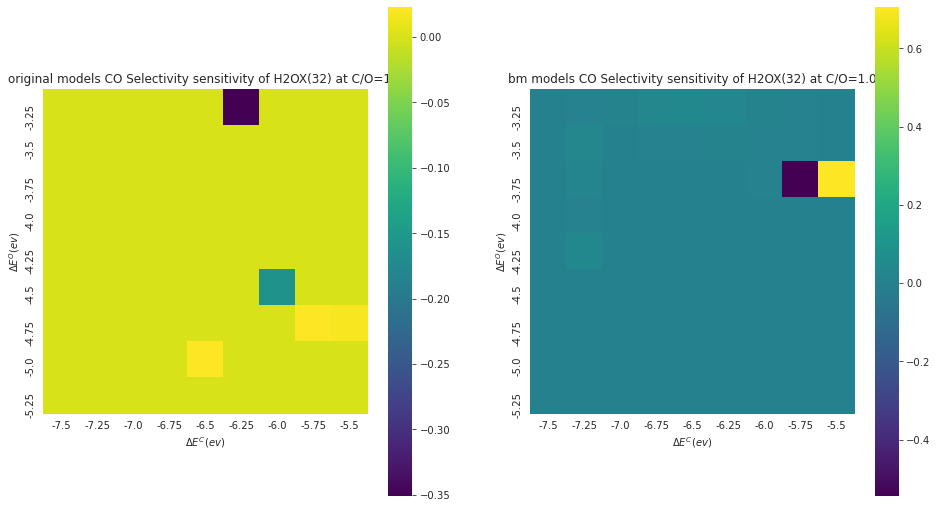

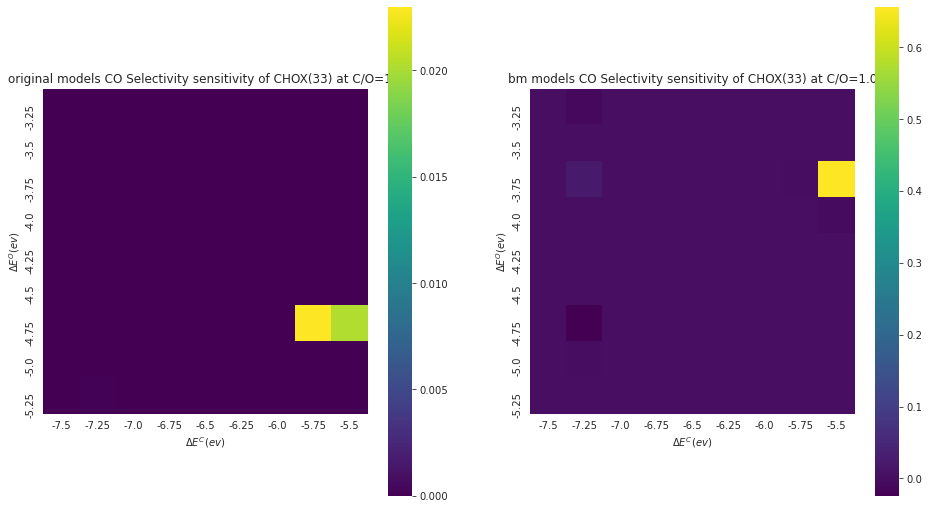

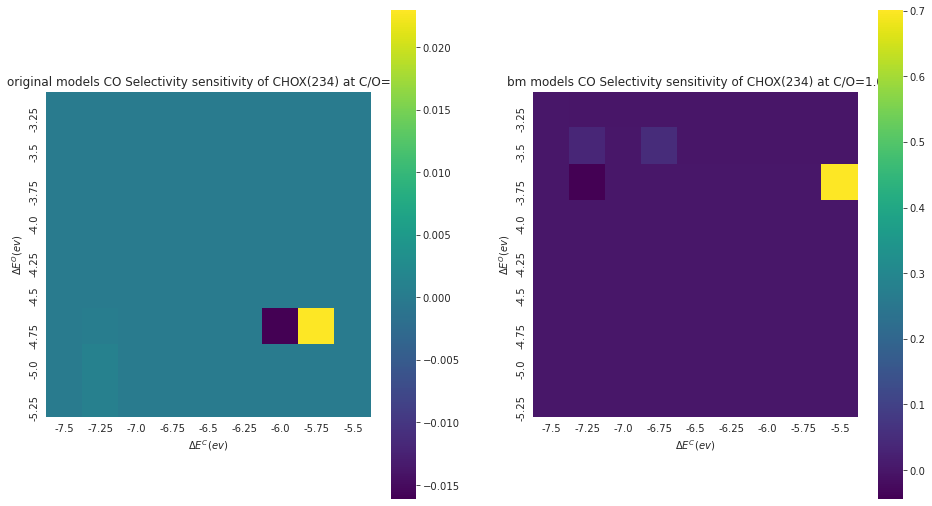

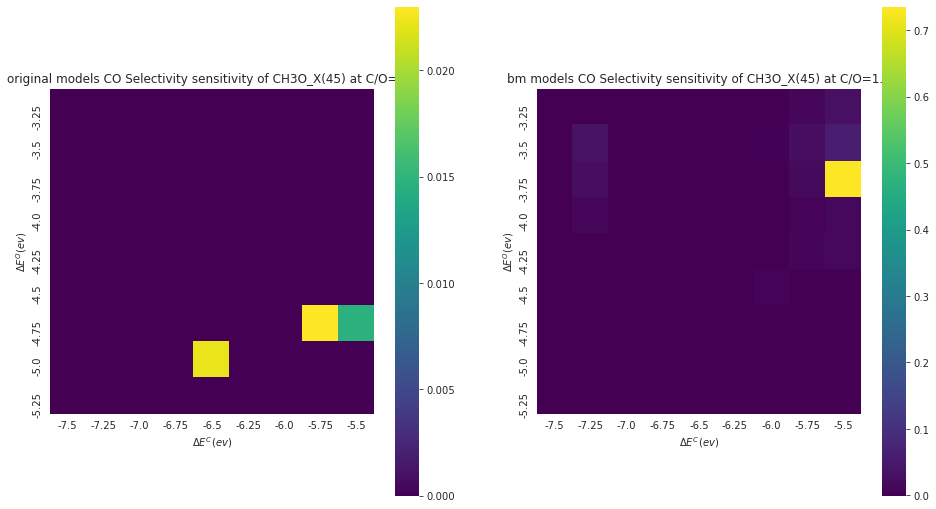

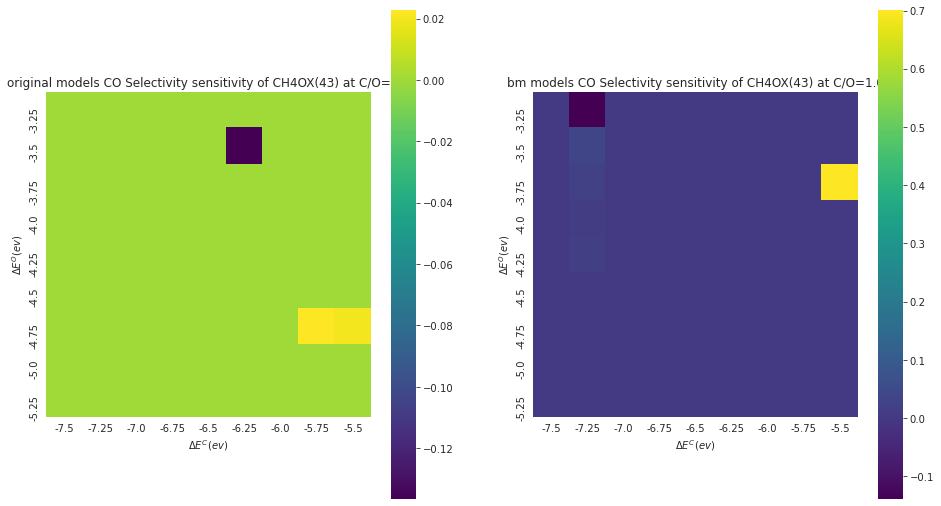

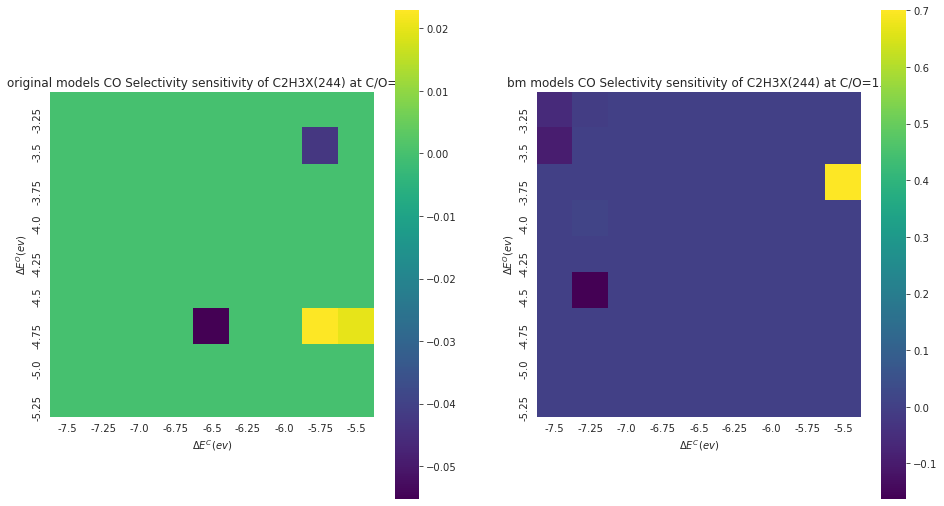

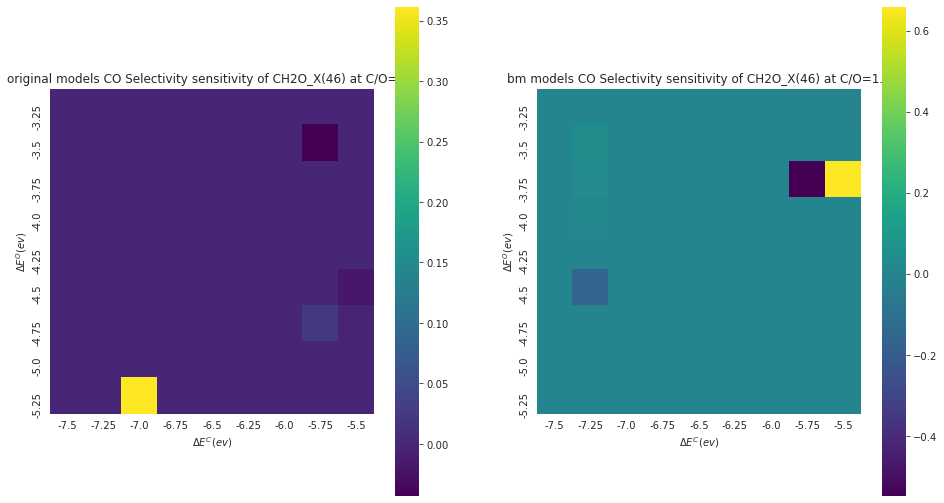

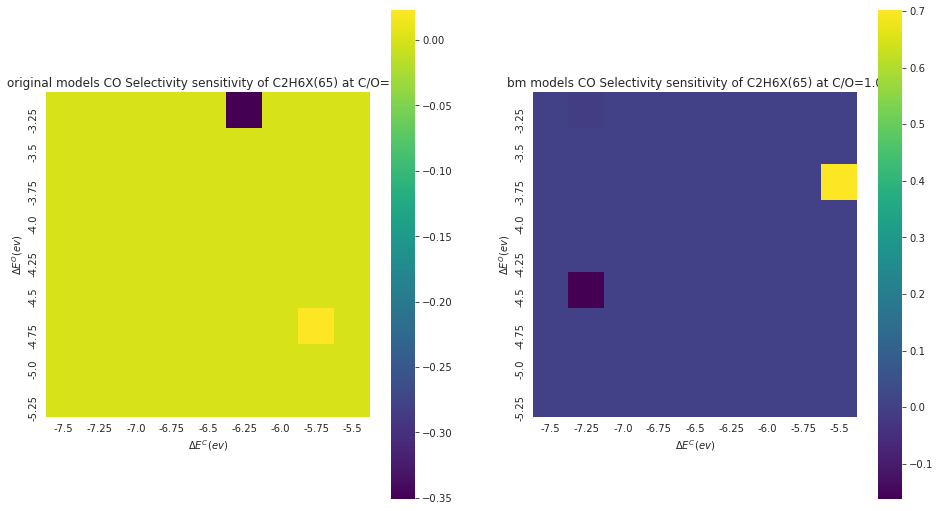

In [15]:
# CO Selectivity kindof intersting for COX
for i in range(1, len(species)):
    heat_map_gen(i,4, exceptions_original, exceptions_bm, 0.6)

[Errno 2] No such file or directory: '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_original/binding_energies/81.0_c-7.50o-5.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 81.0
[Errno 2] No such file or directory: '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_original/binding_energies/81.0_c-7.50o-5.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 81.0
[Errno 2] No such file or directory: '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_original/binding_energies/81.0_c-7.50o-5.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 81.0
[Errno 2] No such file or directory: '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_original/binding_energies/81.0_c-7.50o-5.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 81.0
[Errno 2] No such file or directory: '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_original/binding_energies/81.0_

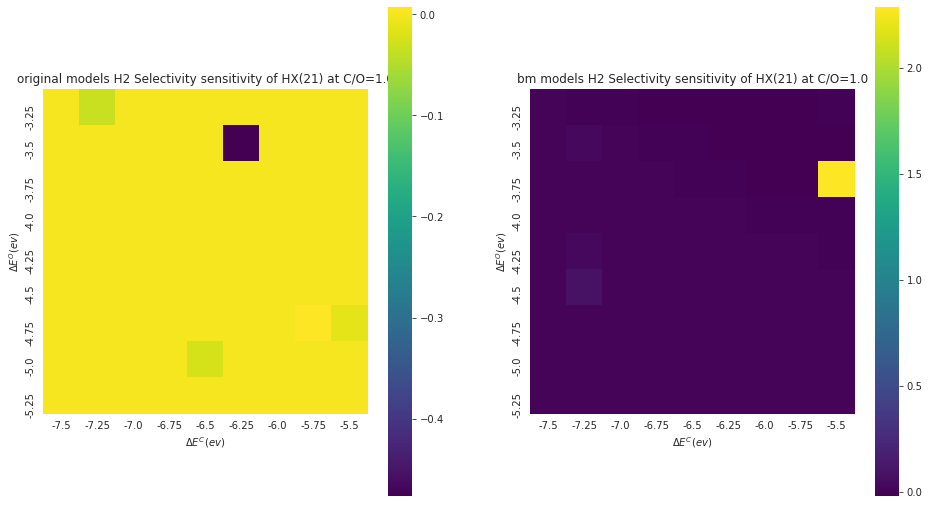

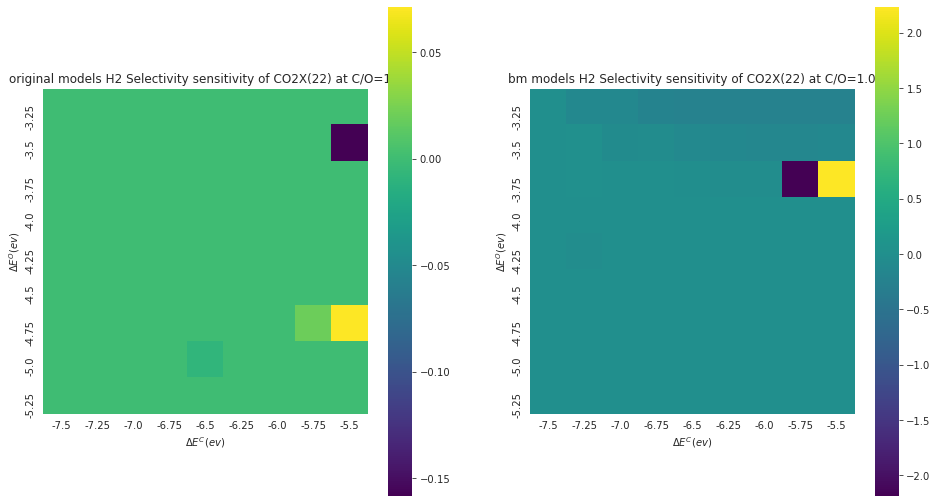

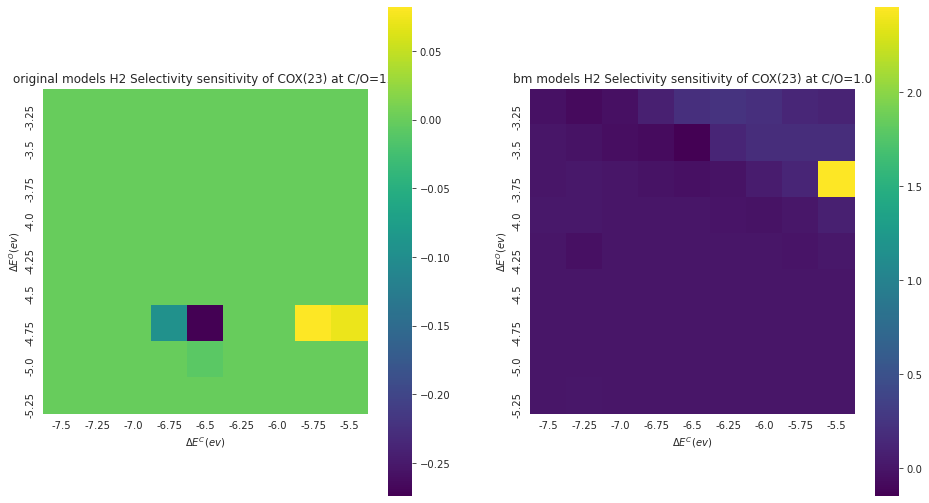

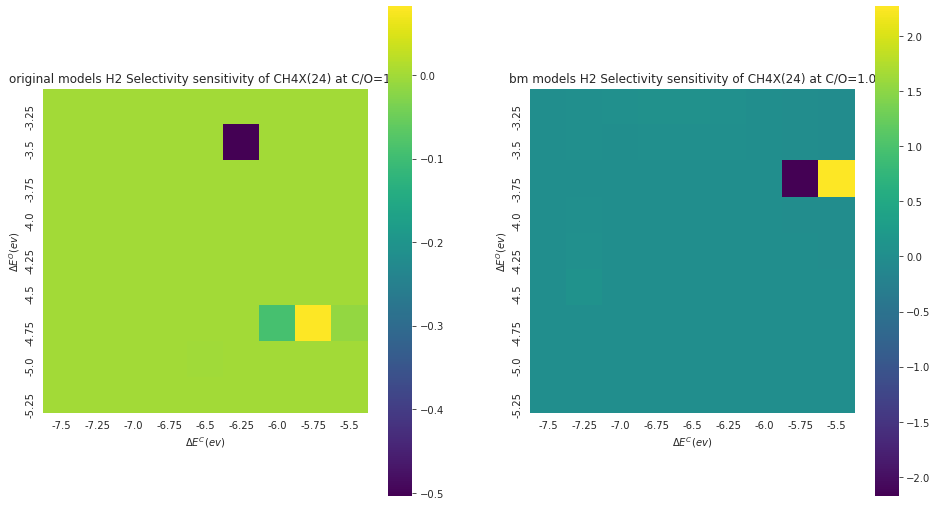

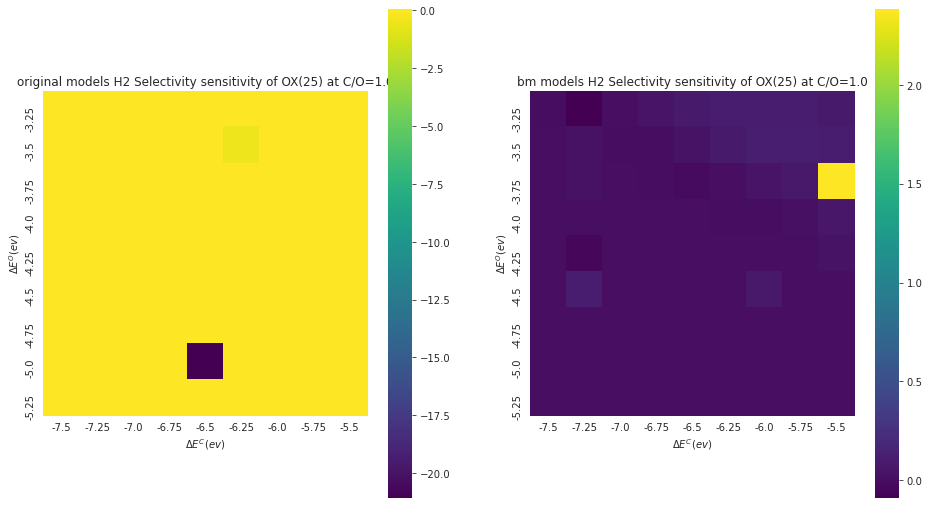

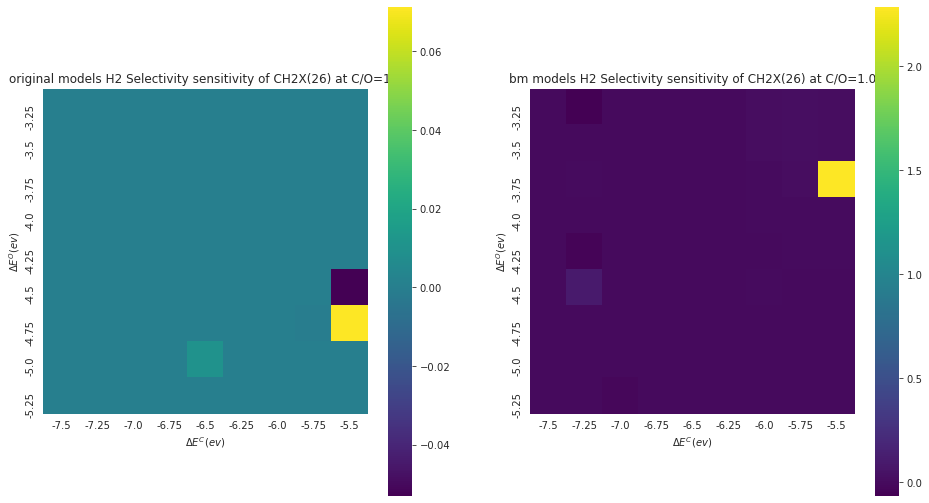

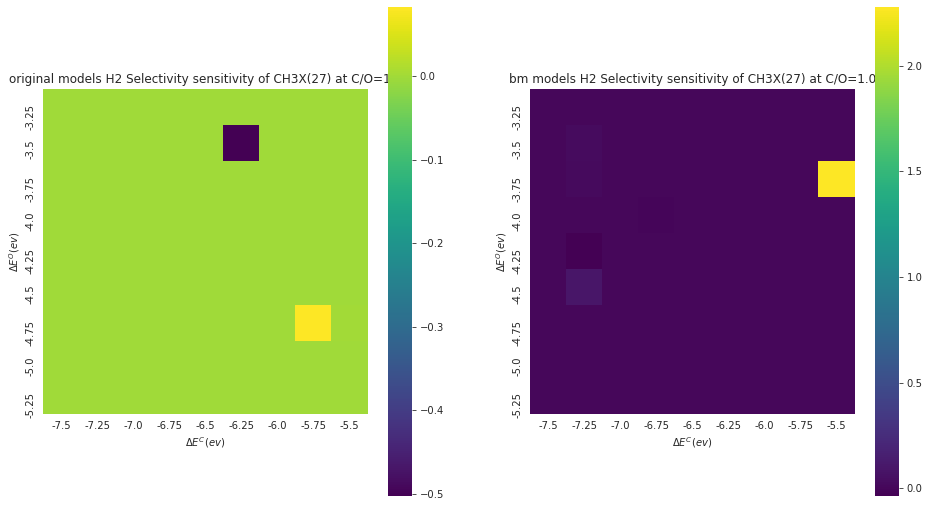

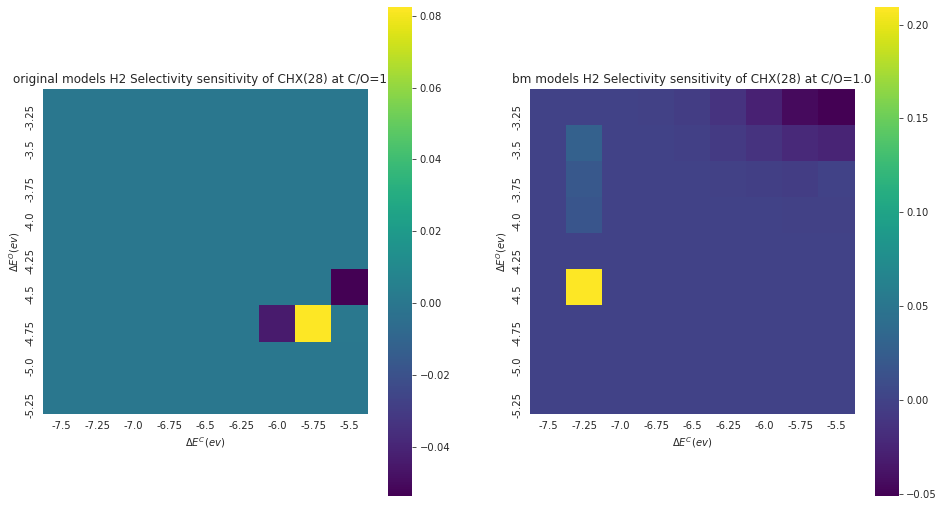

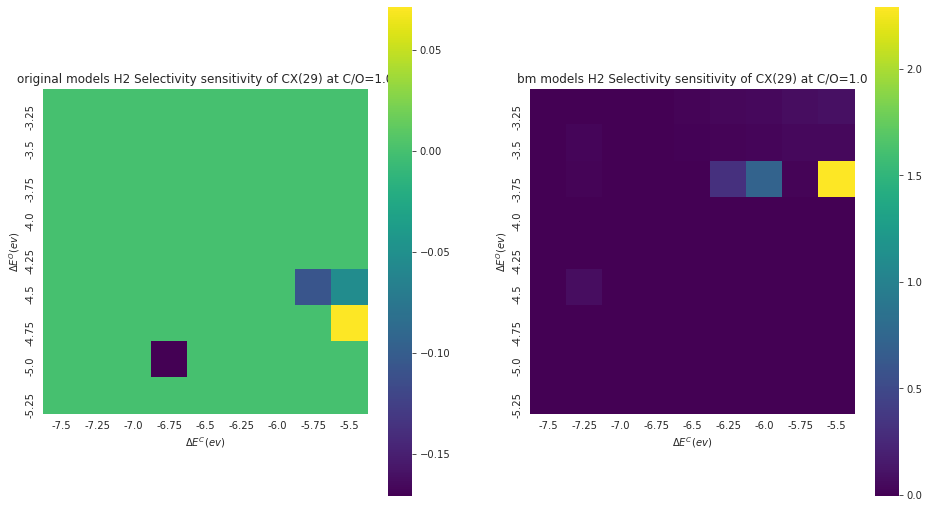

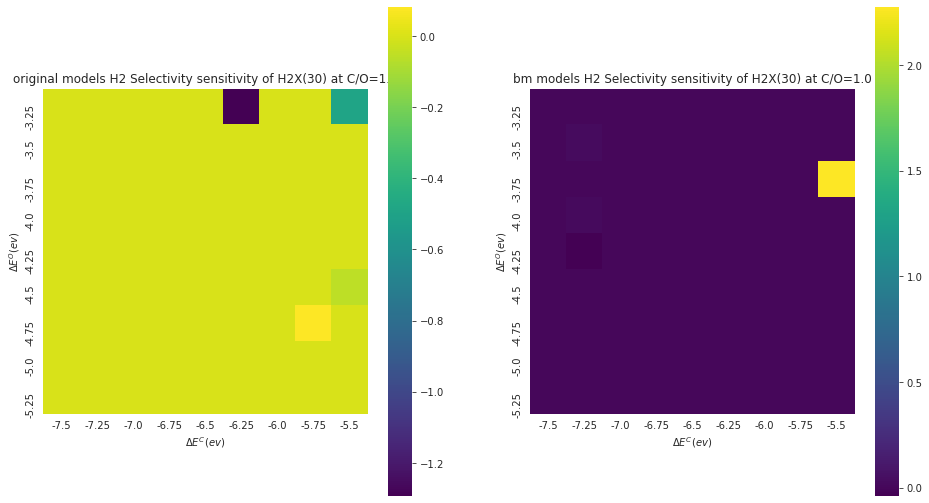

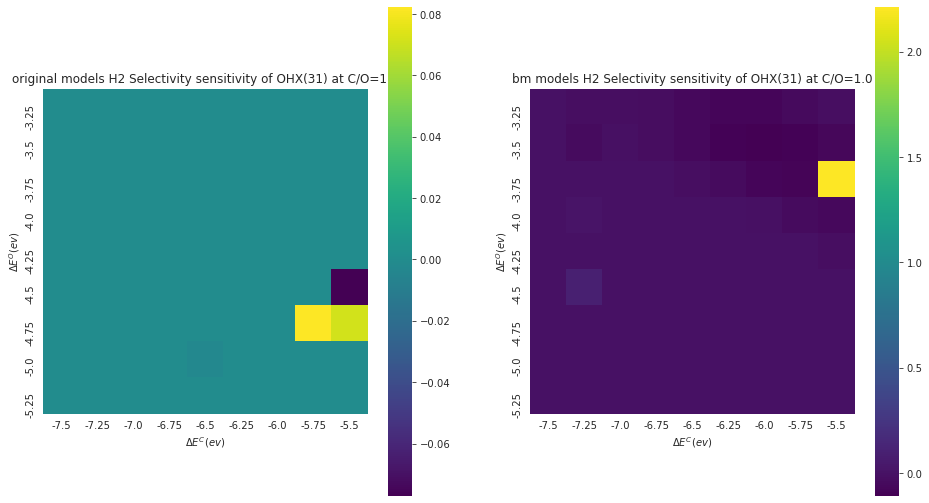

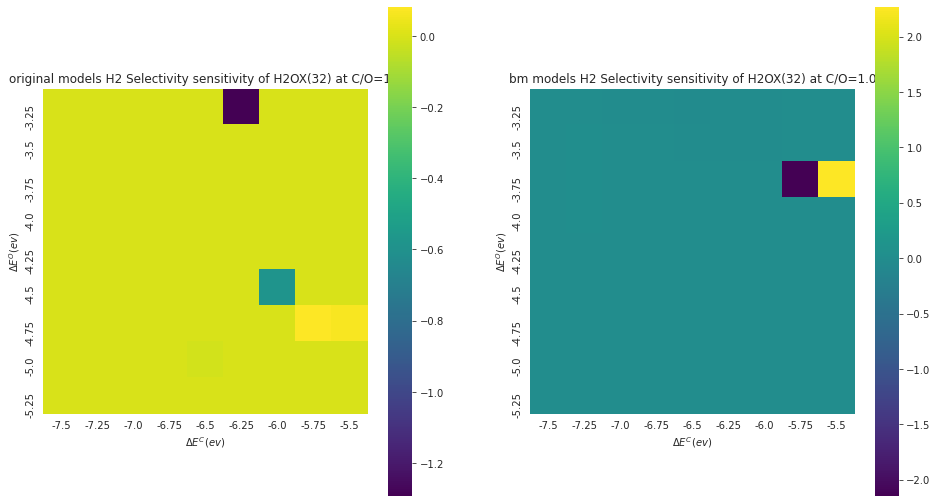

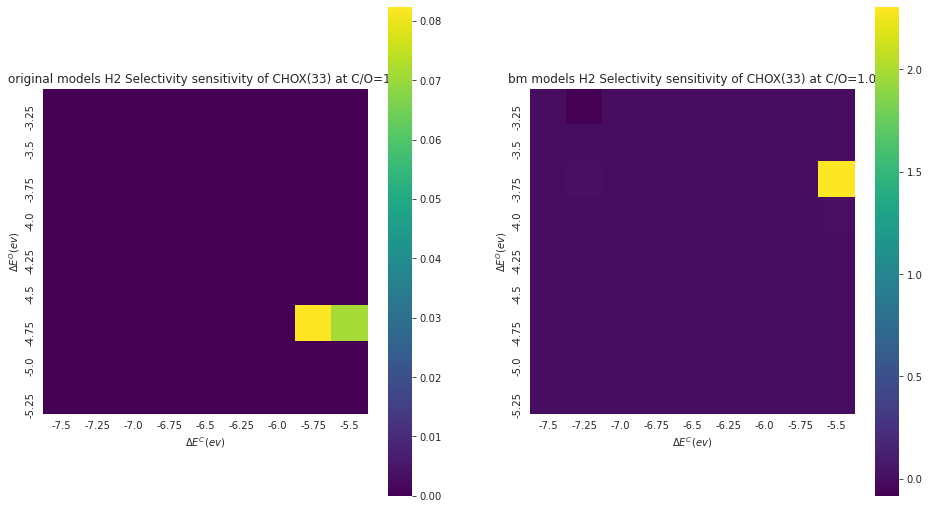

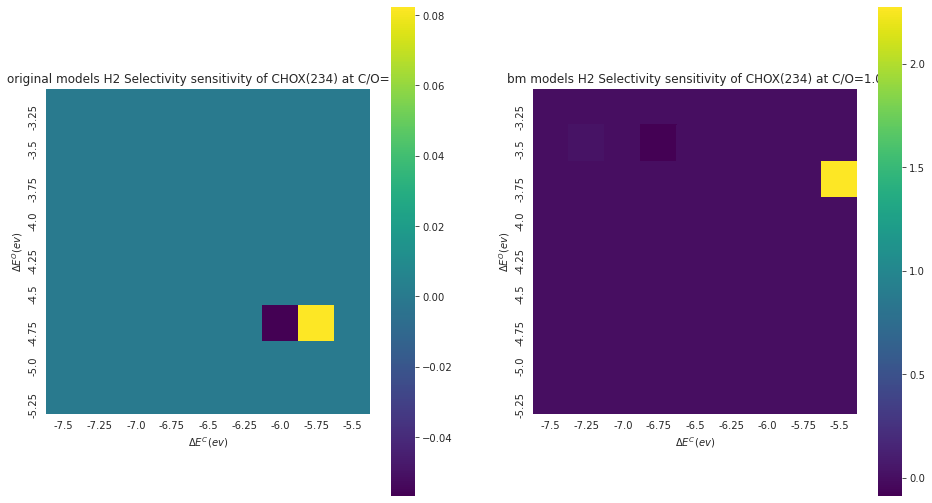

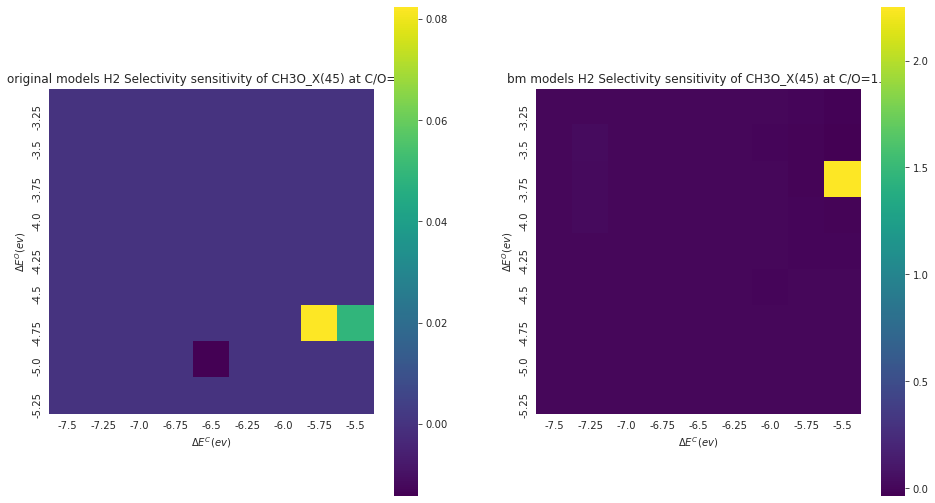

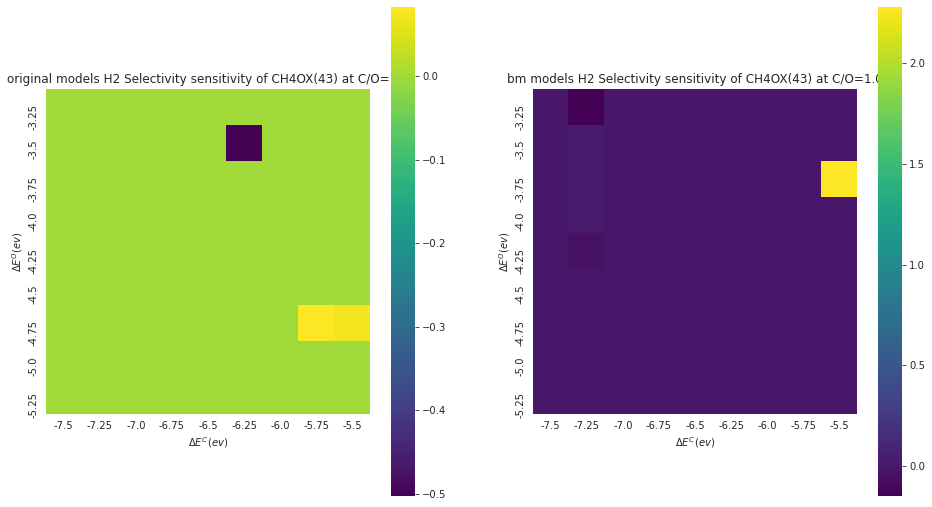

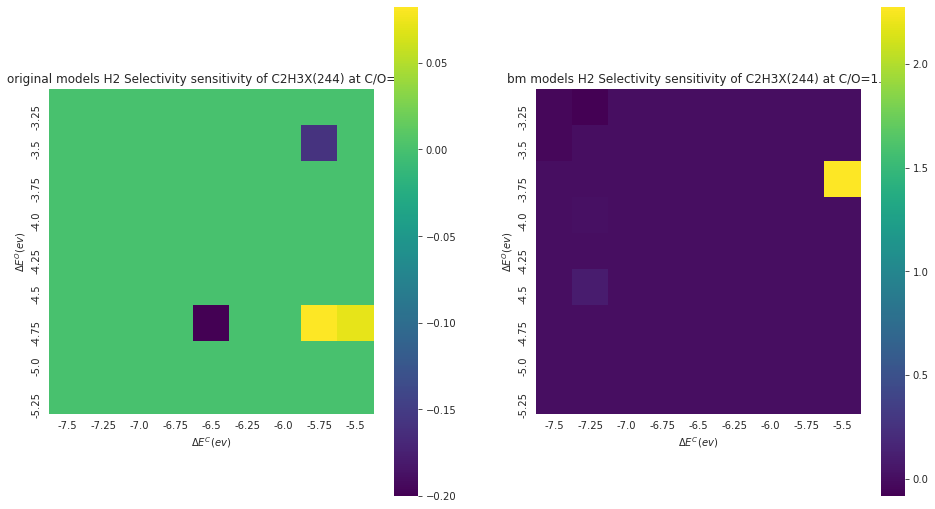

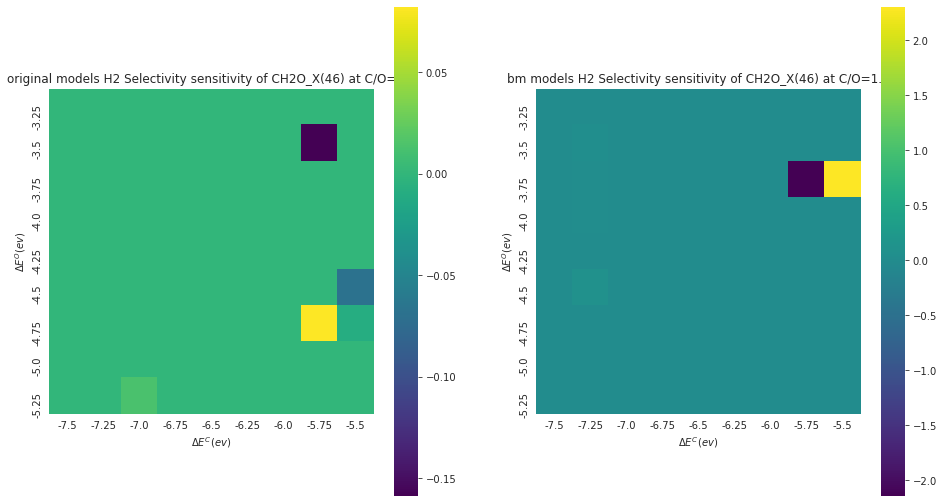

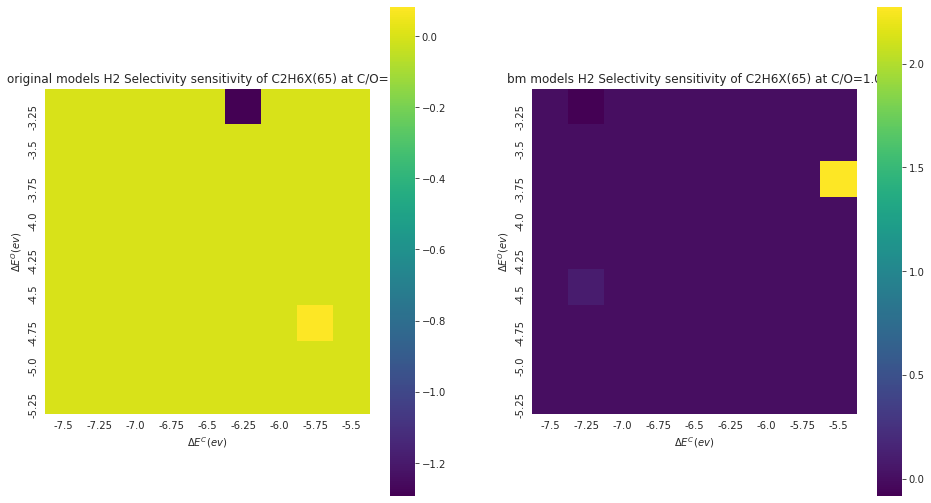

In [16]:
# H2 Selectivity
for i in range(1, len(species)):
    heat_map_gen(i,6, exceptions_original, exceptions_bm, 0.6)

[Errno 2] No such file or directory: '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_original/binding_energies/81.0_c-7.50o-5.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 81.0
[Errno 2] No such file or directory: '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_original/binding_energies/81.0_c-7.50o-5.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 81.0
[Errno 2] No such file or directory: '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_original/binding_energies/81.0_c-7.50o-5.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 81.0
[Errno 2] No such file or directory: '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_original/binding_energies/81.0_c-7.50o-5.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 81.0
[Errno 2] No such file or directory: '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_original/binding_energies/81.0_

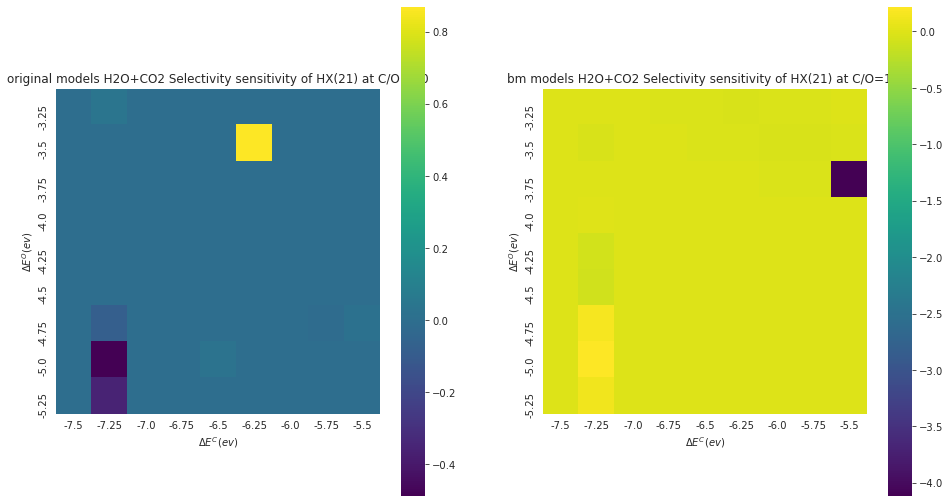

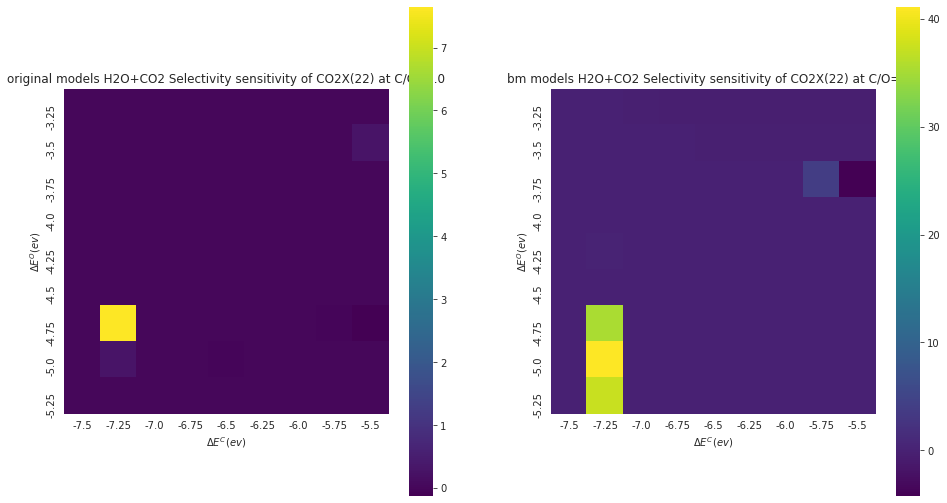

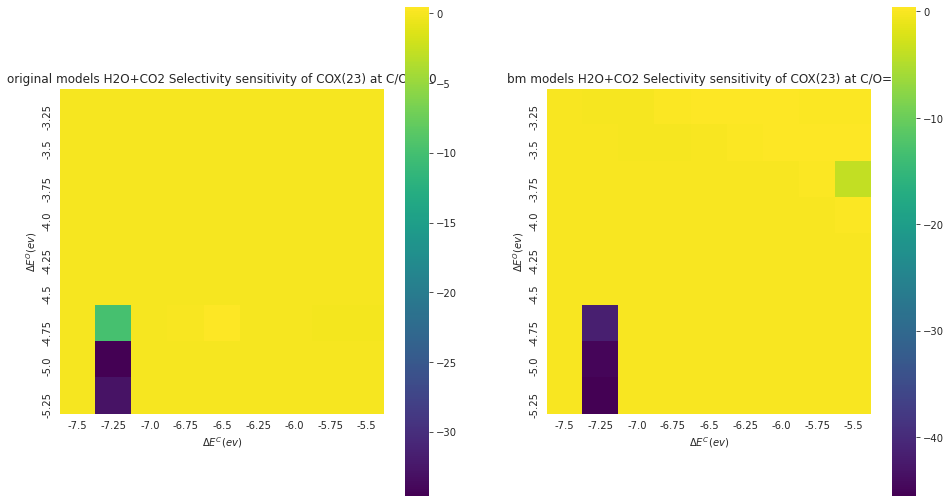

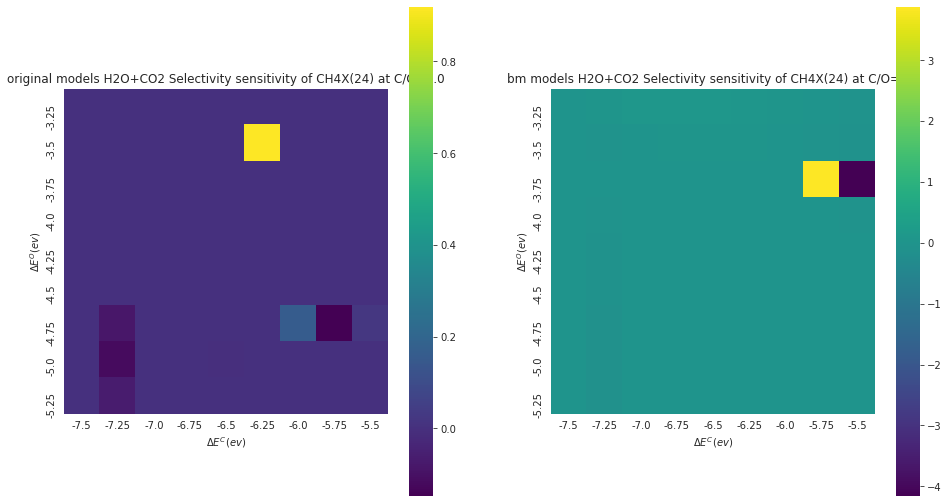

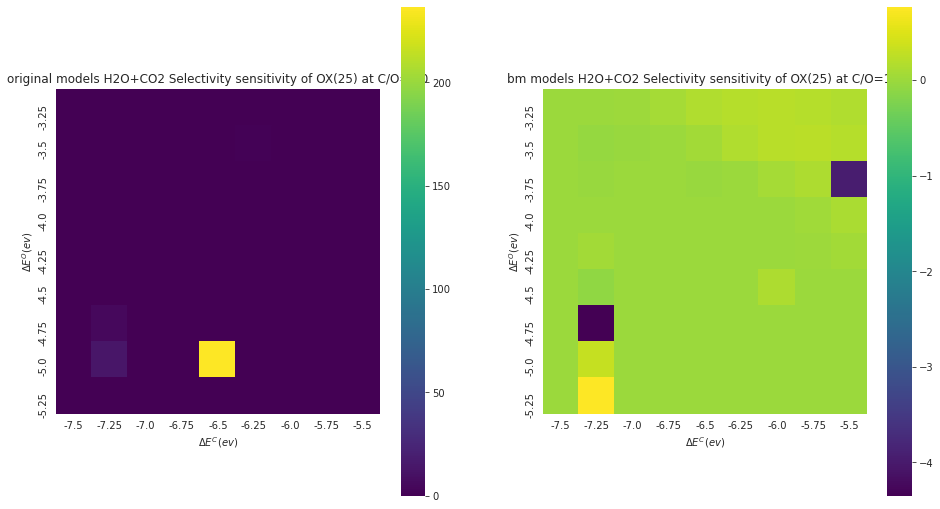

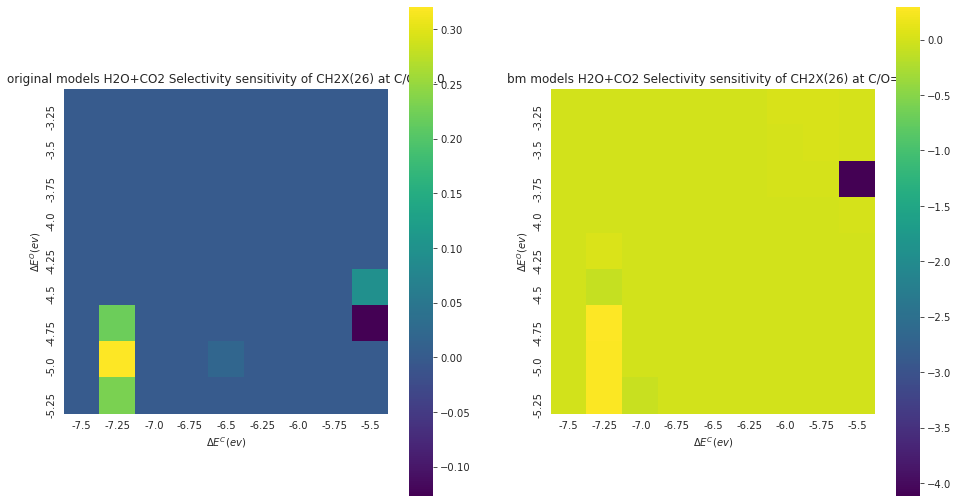

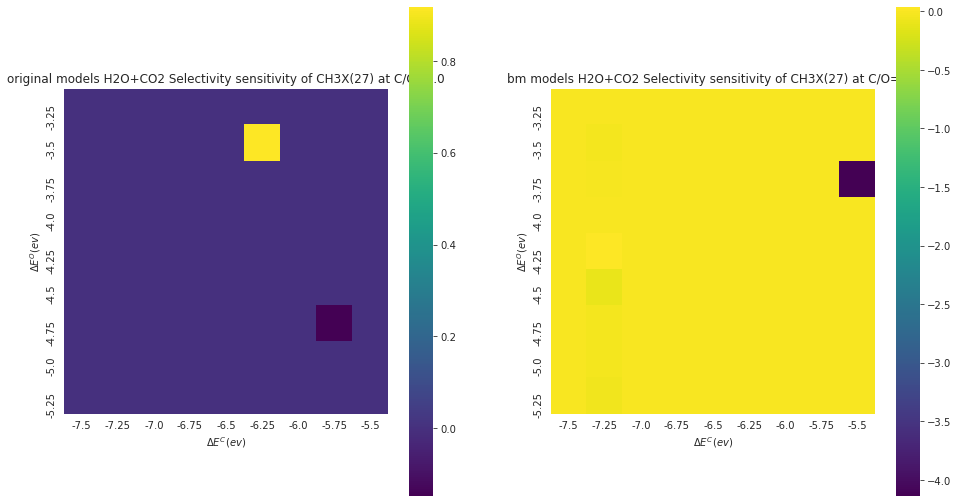

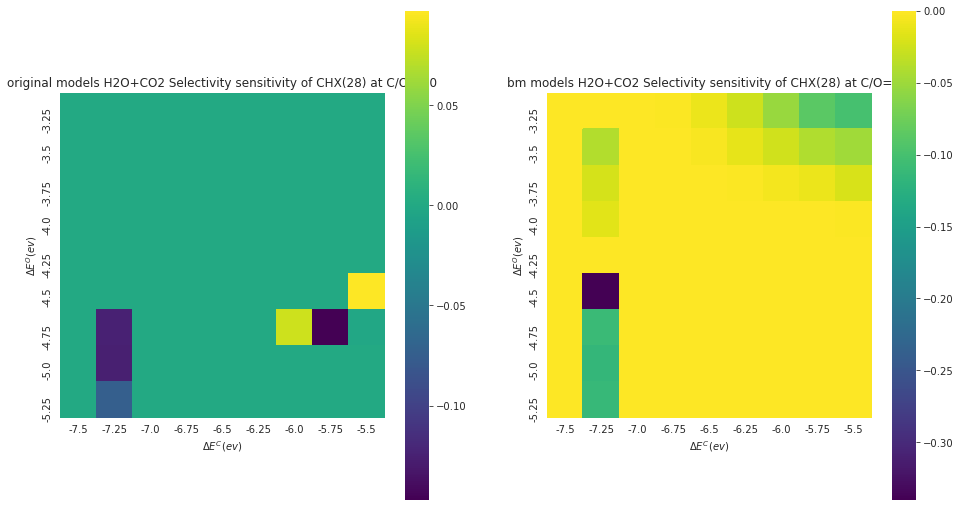

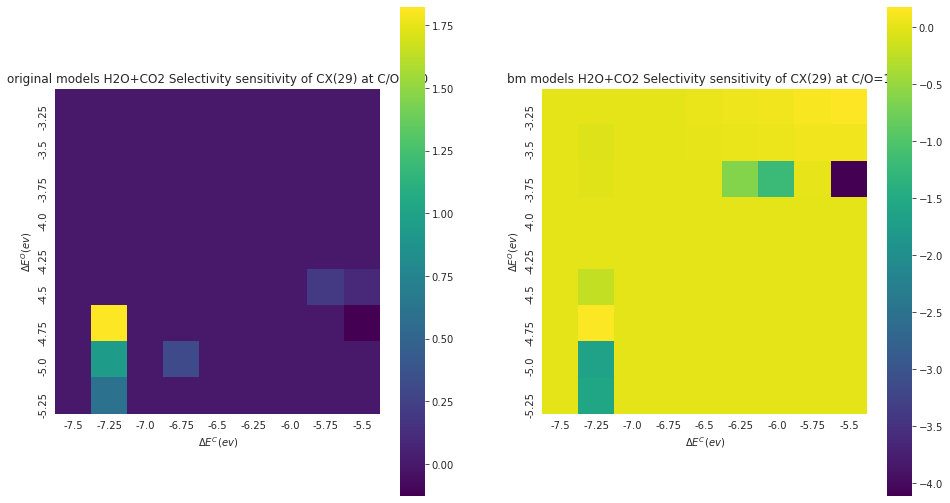

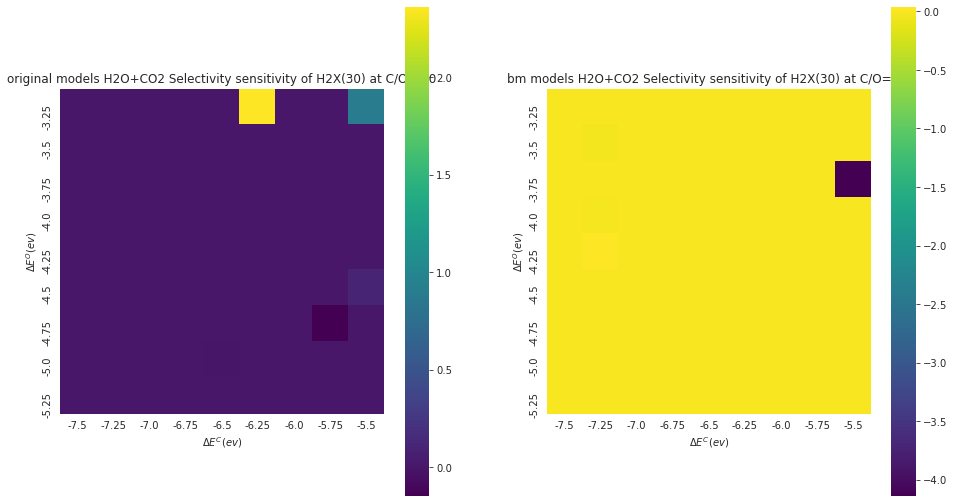

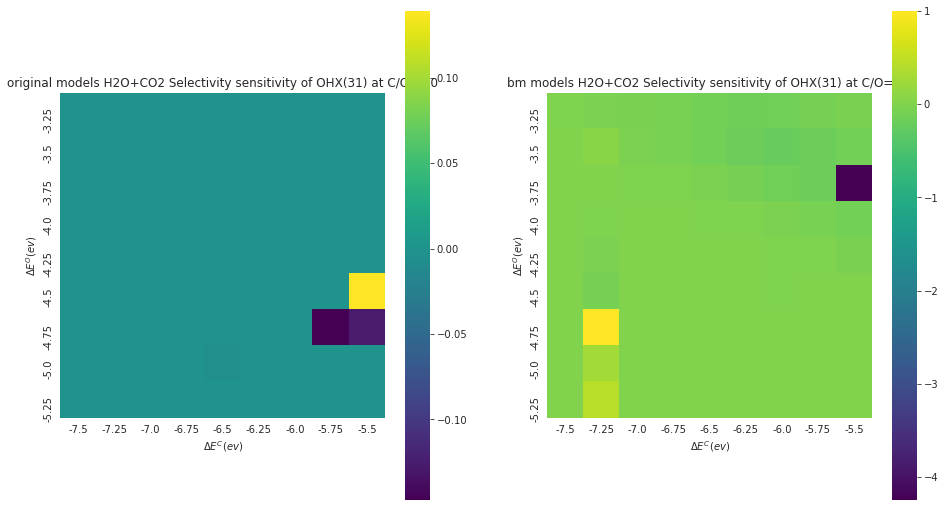

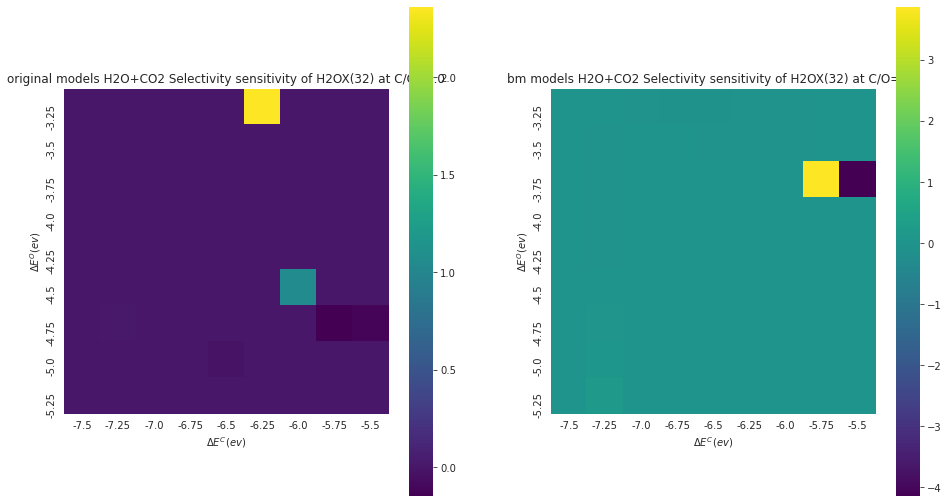

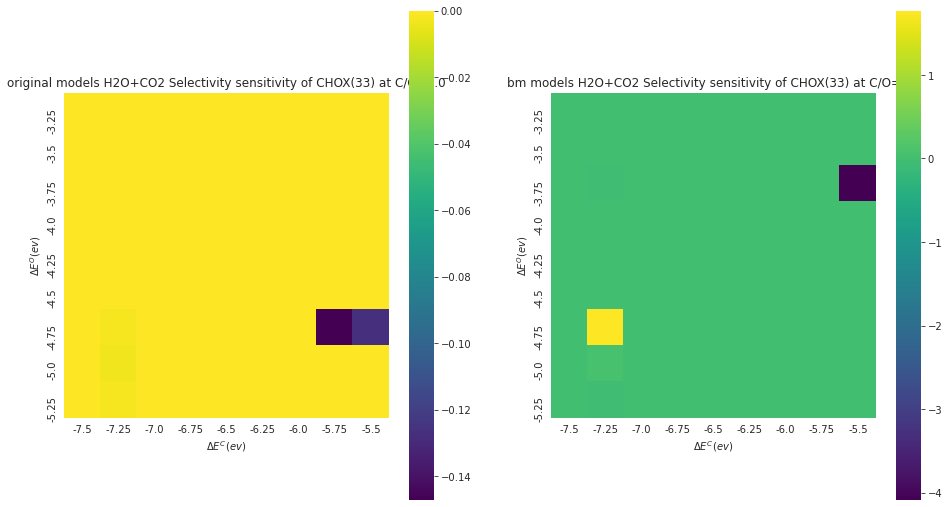

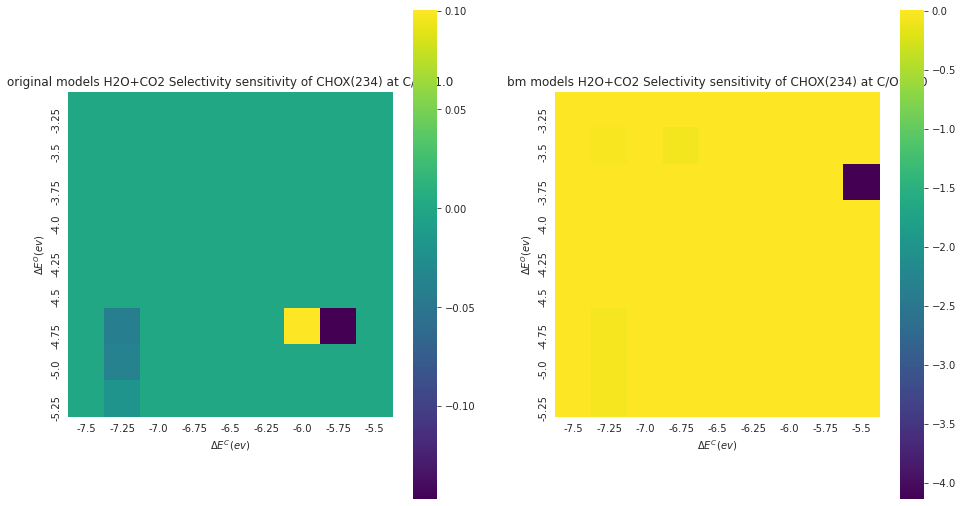

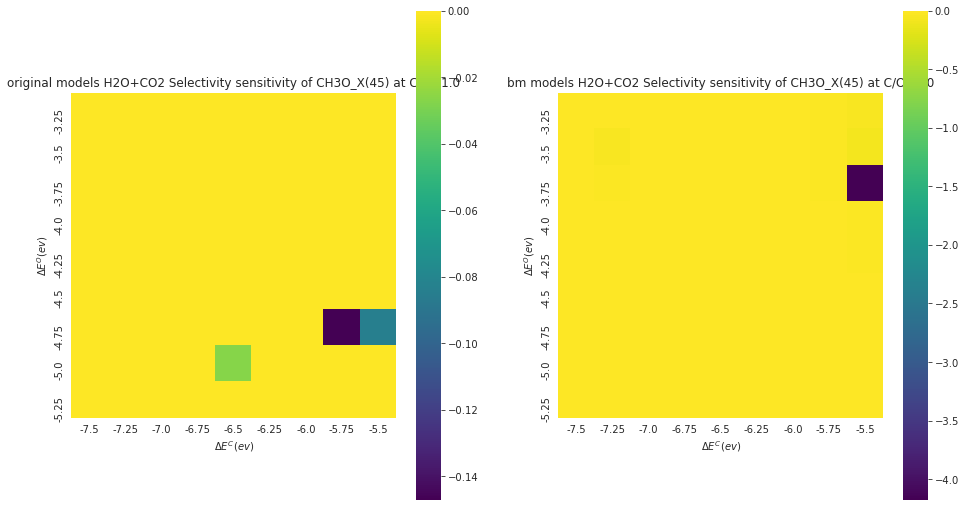

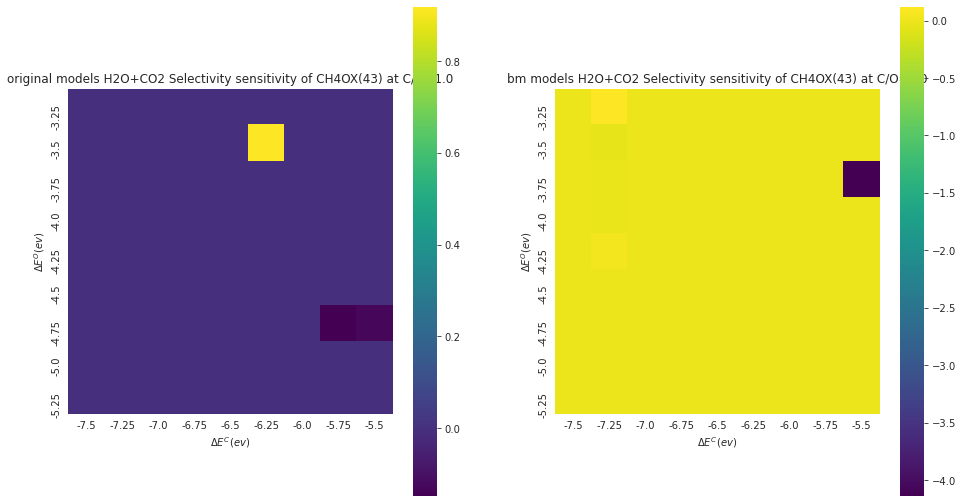

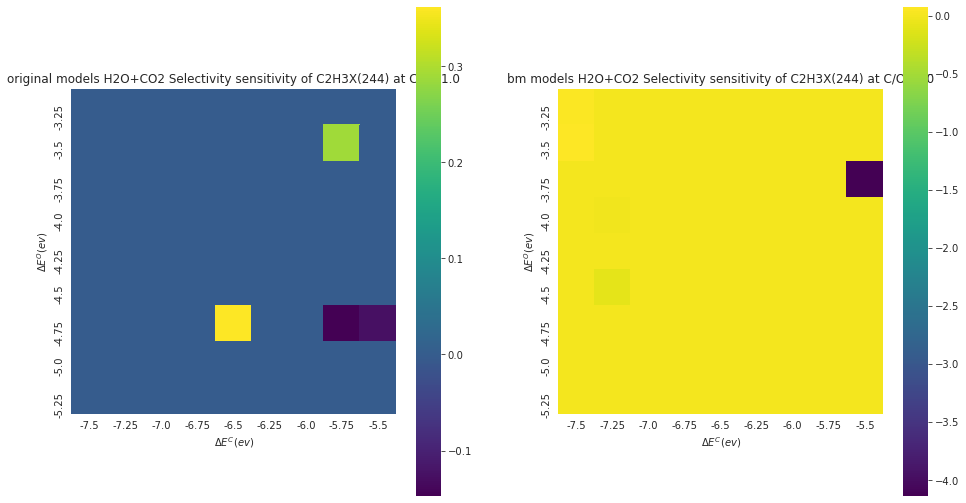

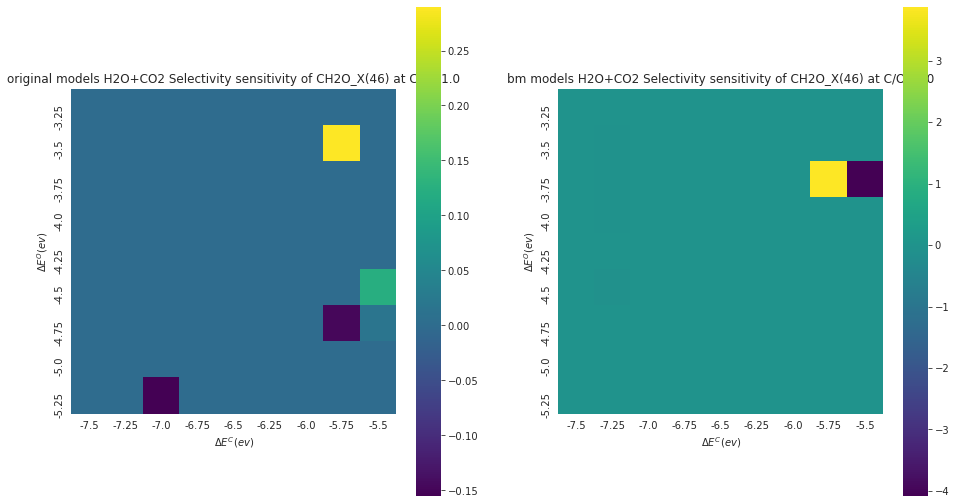

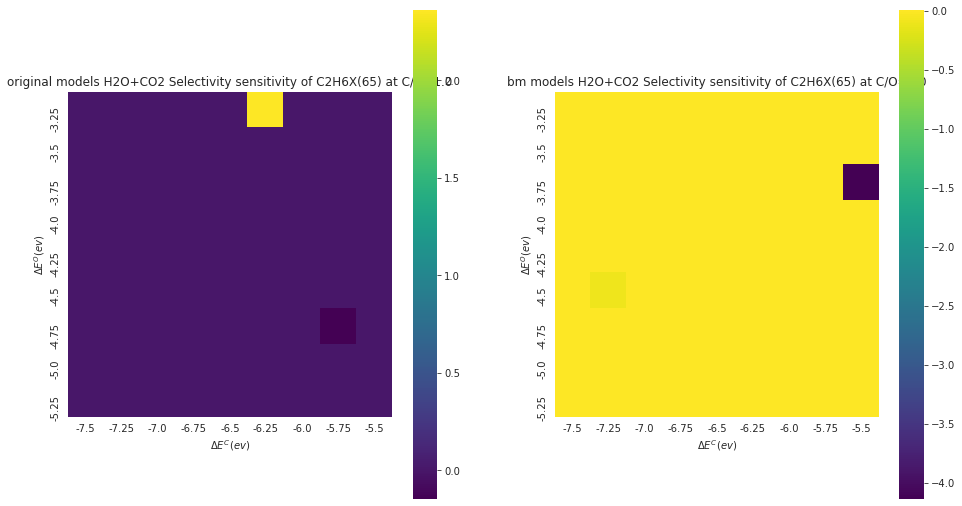

In [18]:
# H2O+CO2 Selectivity
for i in range(1, len(species)):
    heat_map_gen(i,9, exceptions_original, exceptions_bm, 0.6)

[Errno 2] No such file or directory: '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_original/binding_energies/81.0_c-7.50o-5.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 81.0
[Errno 2] No such file or directory: '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_original/binding_energies/81.0_c-7.50o-5.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 81.0
[Errno 2] No such file or directory: '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_original/binding_energies/81.0_c-7.50o-5.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 81.0
[Errno 2] No such file or directory: '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_original/binding_energies/81.0_c-7.50o-5.25/sensitivities/0.6/0.6SpSensitivity_rtol1.00e-10_atol1.00e-20.csv' check log files 81.0
[Errno 2] No such file or directory: '/home/xu.chao/sketches/cpox_sim/rmg_models_bm/base_original/binding_energies/81.0_

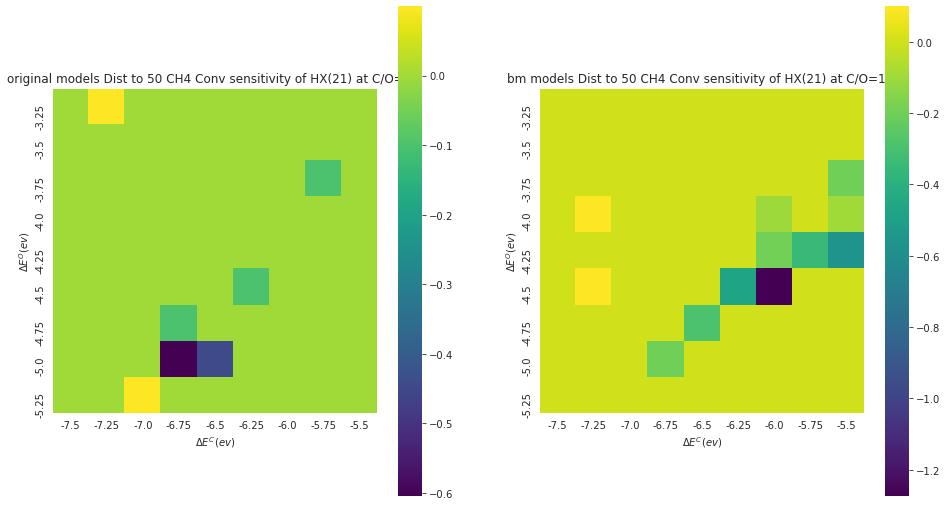

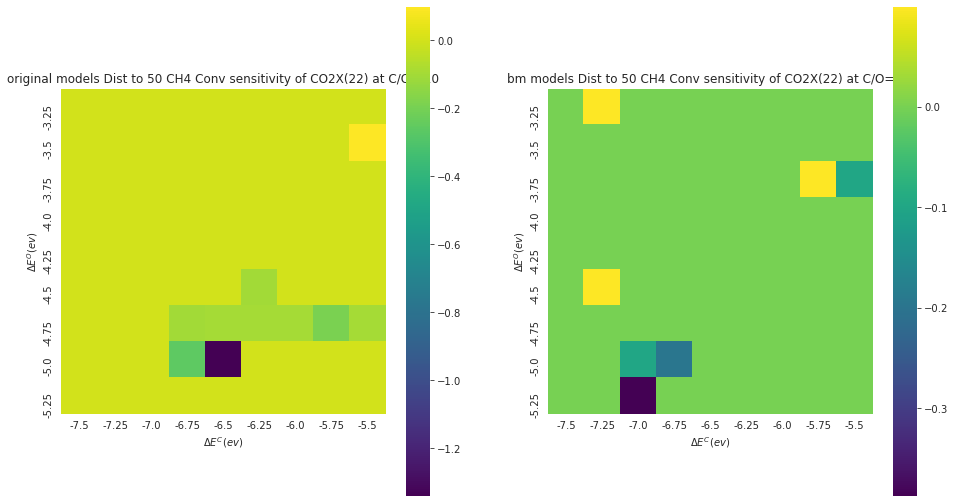

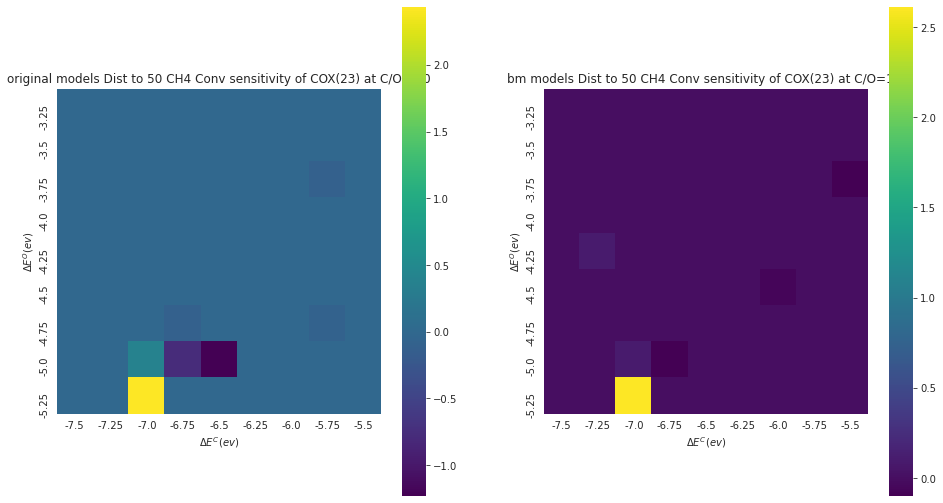

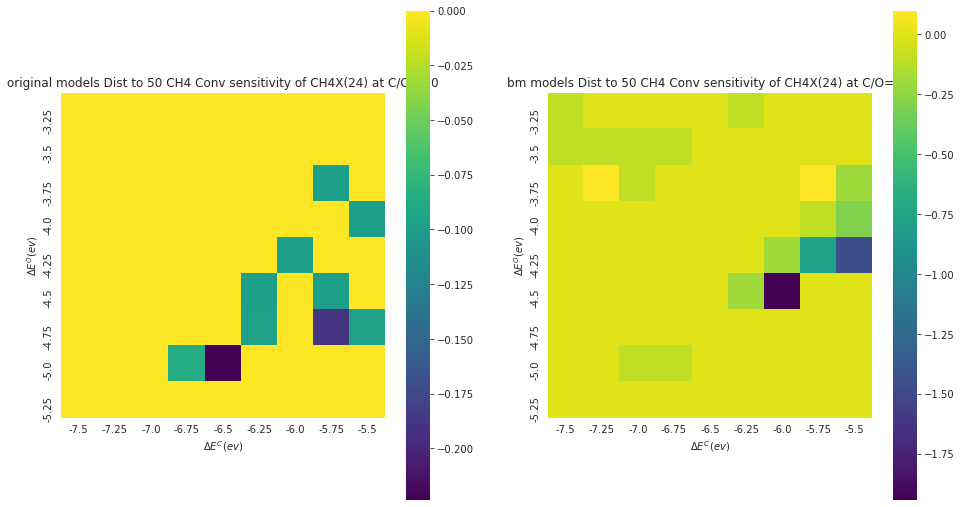

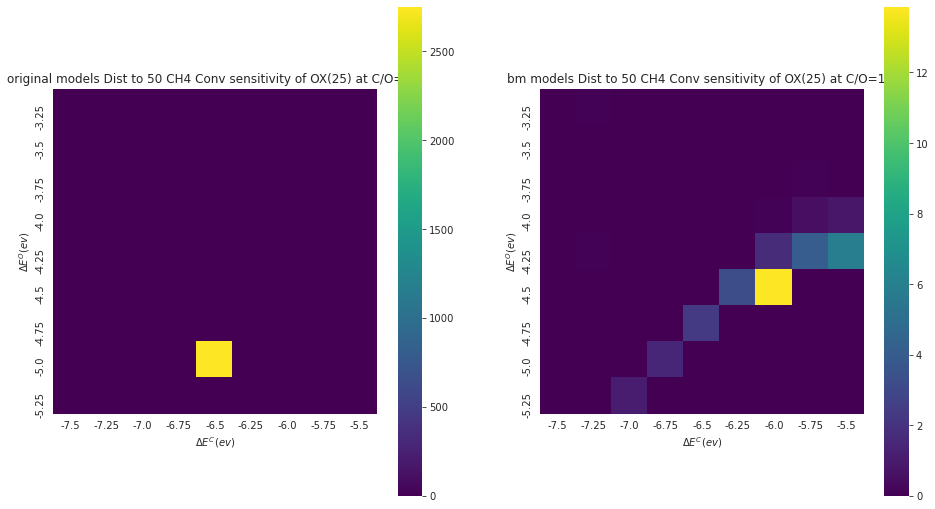

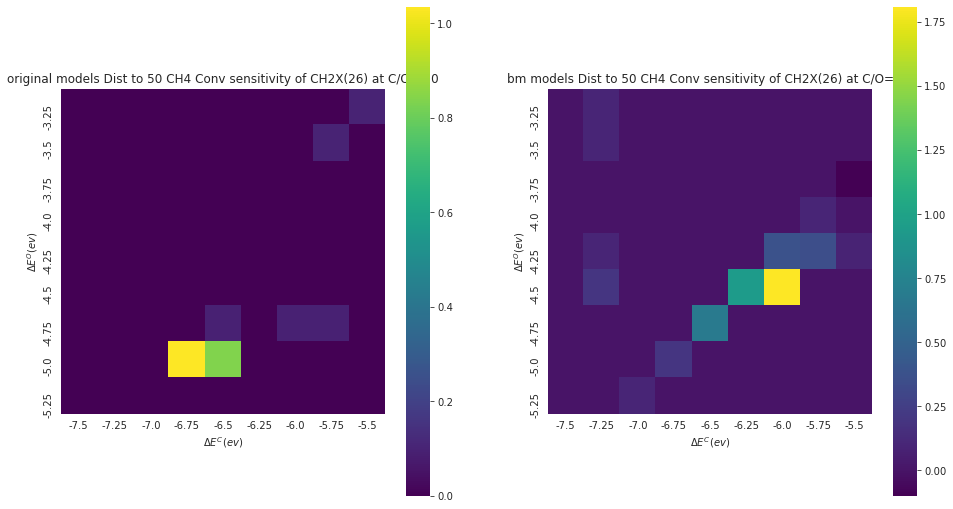

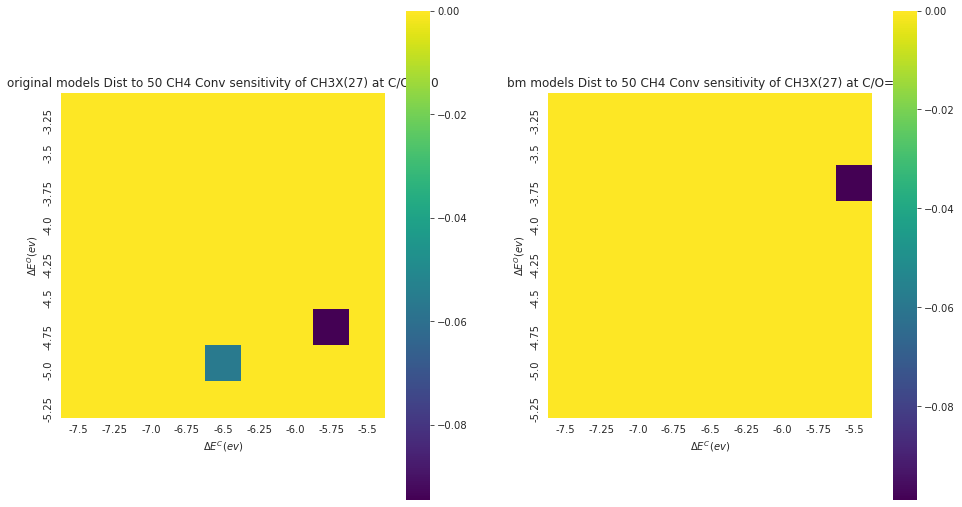

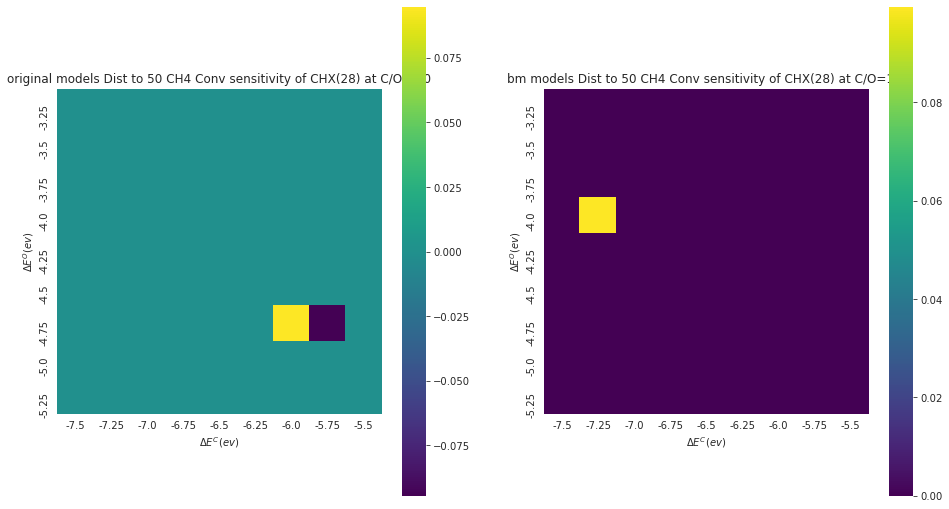

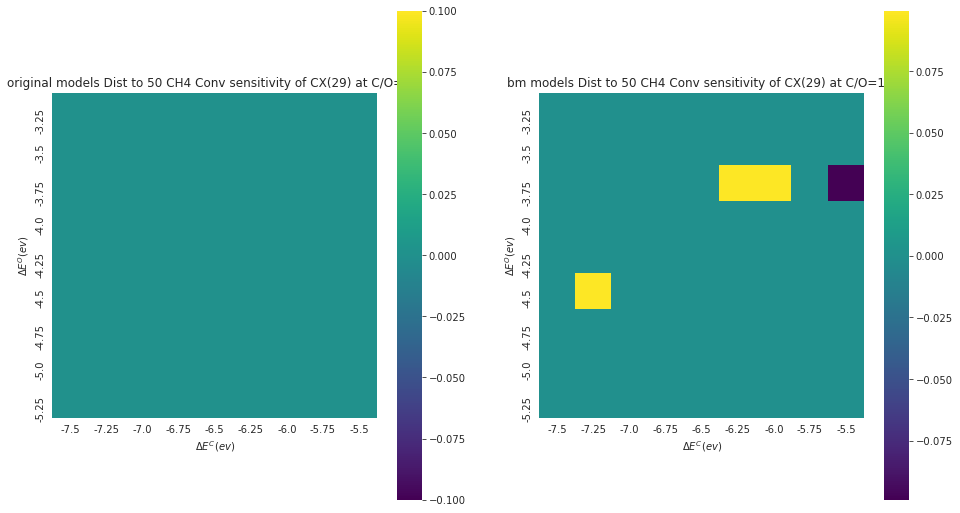

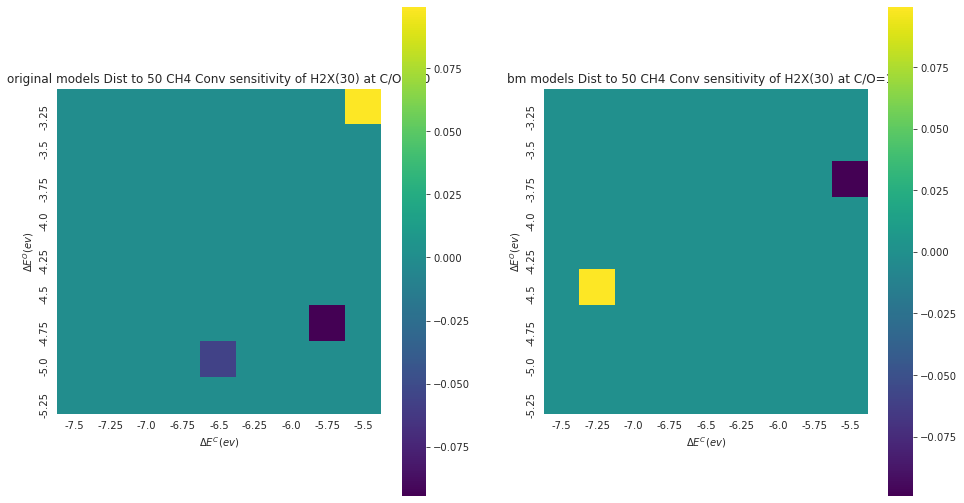

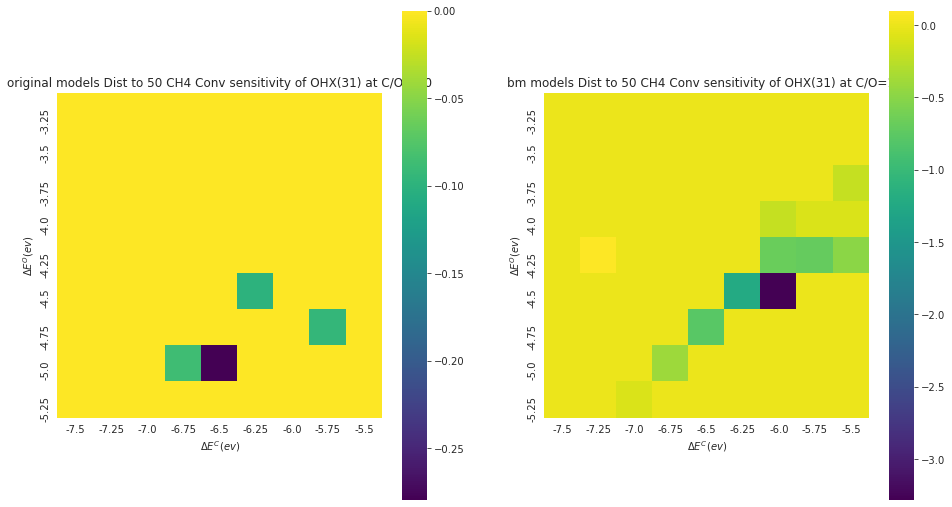

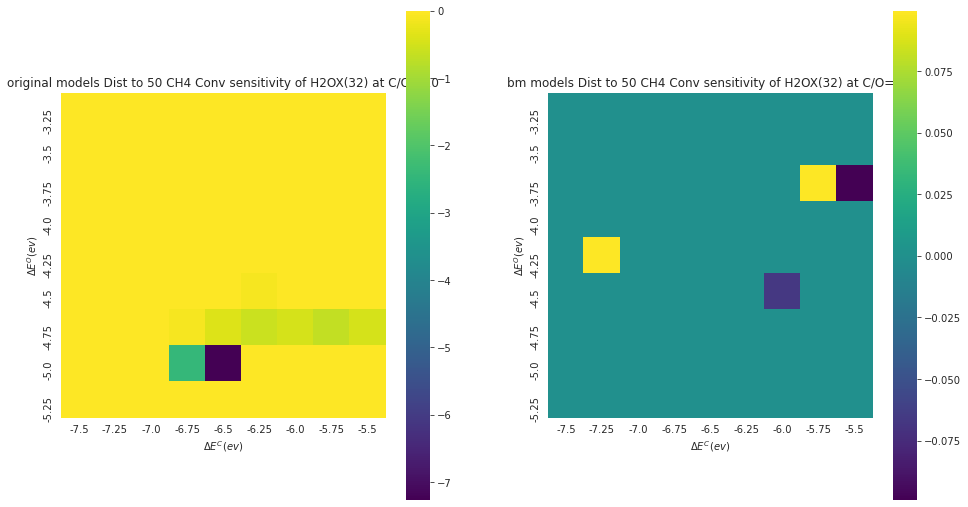

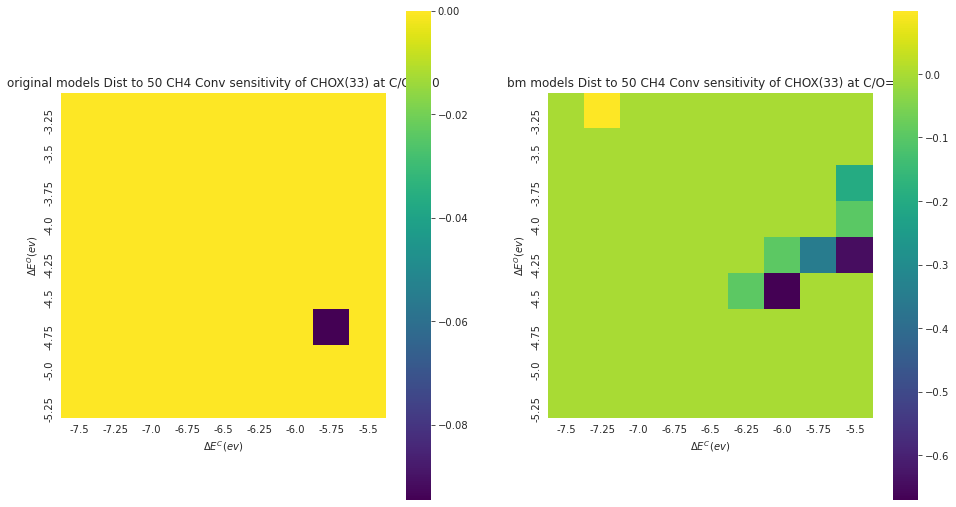

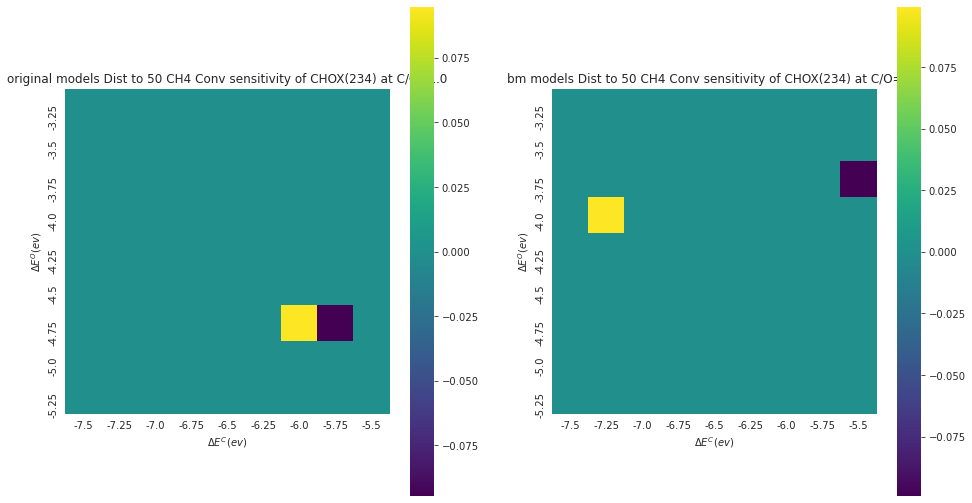

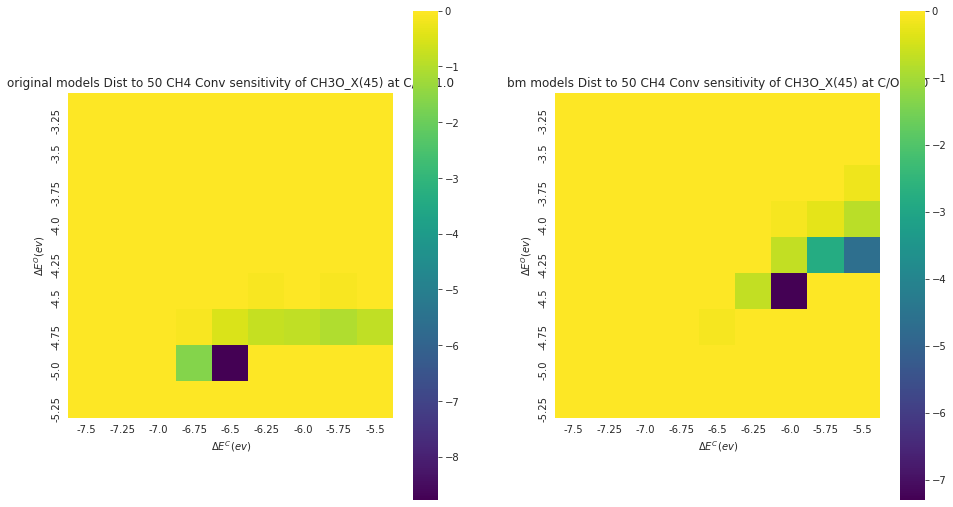

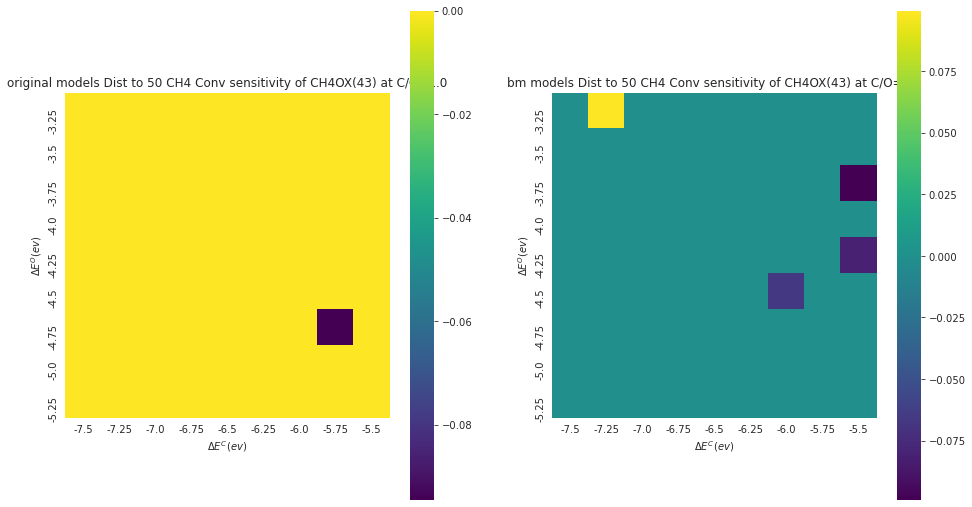

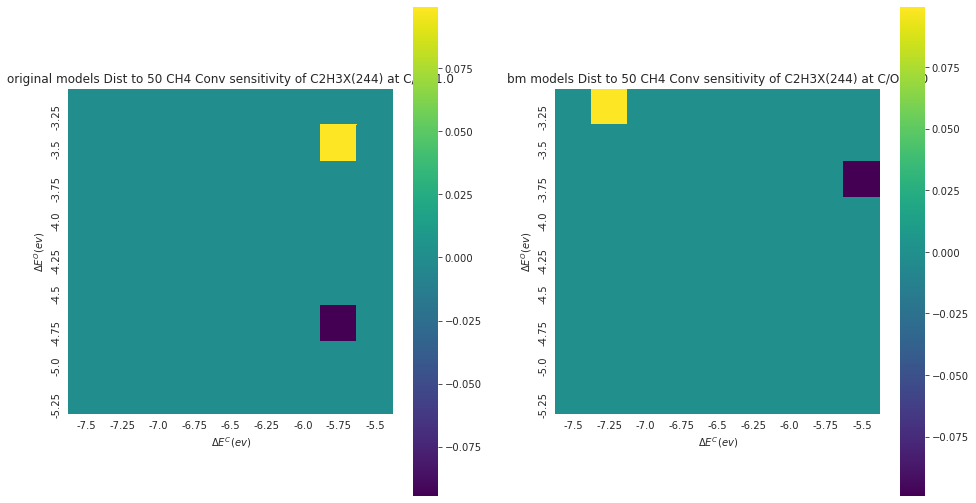

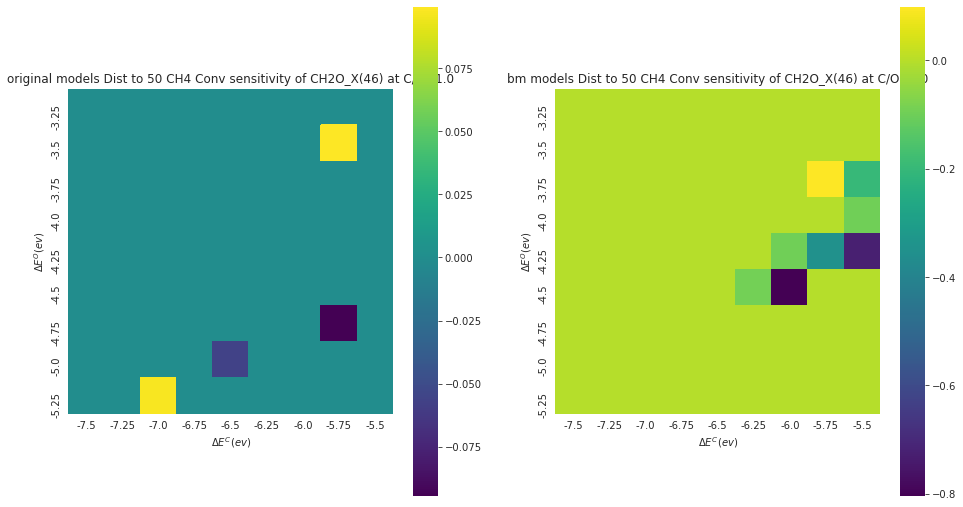

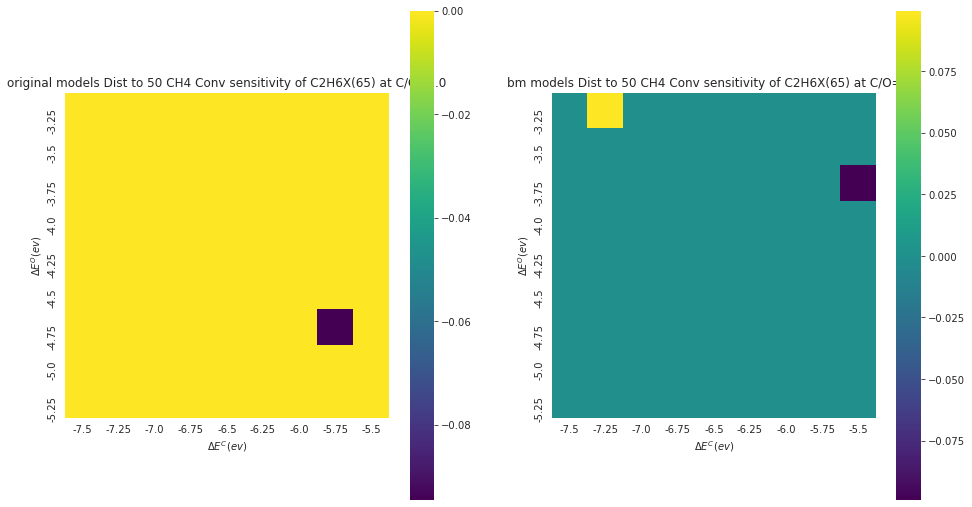

In [19]:
# Dist to 50 CH4 Conv
for i in range(1, len(species)):
    heat_map_gen(i,16, exceptions_original, exceptions_bm, 0.6)